# This notebook will generate the output of the apoptosis model

---
## Apoptosis Model
### Model scope
This model was published by Albeck *et al.* 2008 (https://doi.org/10.1371/journal.pbio.0060299) and modified by Loriaux *et al.* 2013 to include expression and degradation of most chemical species (https://doi.org/10.1371/journal.pcbi.1002901). The key finding of this model is the variable delay switch-like behavior. Scope is shown below:

In [1]:
using DifferentialEquations, DataFrames
using Plots, StatsPlots
using CSV, Tables
using Sundials

Experimental Data: Expression of Bcl-2 proteins

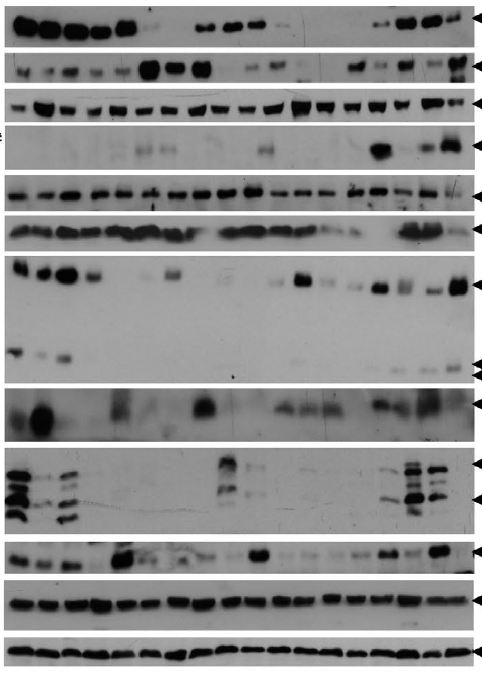

In [2]:
display("image/png",read("images/Bcl2_Exp.png"))

In [3]:
#Data extracted from western blot using ImageJ
df1 = DataFrame(CSV.File("../multiscale-bcell-master/Apoptosis_modelFiles/Bcl2_exp.csv"))

,Protein,RIVA,U2932,RCK8,SUDHL8,SUDHL10,U2946
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,Bcl2,2575.75,3370.75,153.556,0.0,0.0,0.0
2,BclxL,353.435,167.435,2342.09,1278.09,0.0,0.0
3,Mcl1,333.899,1720.63,588.314,664.142,1109.26,1463.04
4,A1,0.0,0.0,186.142,105.728,0.0,0.0
5,BAK,658.092,578.385,541.799,604.506,469.799,480.849
6,BAX,982.092,872.971,1661.09,1410.51,349.556,1114.68
7,BIM,928.213,1131.21,77.607,387.556,105.728,987.092
8,NOXA,928.598,2650.91,212.849,0.0,679.042,567.92
9,PUMA,781.092,367.385,426.092,100.314,0.0,0.0


In [4]:
#Data extracted from western blot using ImageJ
#Normalised
df3 = DataFrame(CSV.File("../multiscale-bcell-master/Apoptosis_modelFiles/Bcl2_exp_norm.csv"))

,Protein,RIVA,U2932,RCK8,SUDHL8,SUDHL10,U2946
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,Bcl2,1.655,2.37,0.129,0.0,0.0,0.0
2,BclxL,0.227,0.118,1.961,1.11,0.0,0.0
3,Mcl1,0.215,1.21,0.493,0.577,1.211,1.121
4,A1,0.0,0.0,0.156,0.092,0.0,0.0
5,BAK,0.423,0.407,0.454,0.525,0.513,0.368
6,BAX,0.582,0.609,1.976,1.137,0.288,1.226
7,BIM,0.597,0.795,0.065,0.337,0.115,0.756
8,NOXA,0.597,1.864,0.178,0.781,0.741,0.435
9,PUMA,0.502,0.258,0.357,0.087,0.0,0.0


In [5]:
df3t = DataFrame(CSV.File("../multiscale-bcell-master/Apoptosis_modelFiles/Bcl2_exp_norm_t.csv"))

,Cell,Bcl2,BclxL,Mcl1,A1,BAK,BAX,BIM,NOXA
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,RIVA,1.655,0.227,0.215,0.0,0.423,0.582,0.597,0.597
2,U2932,2.37,0.118,1.21,0.0,0.407,0.609,0.795,1.864
3,RCK8,0.129,1.961,0.493,0.156,0.454,1.976,0.065,0.178
4,SUDHL8,0.0,1.11,0.577,0.092,0.525,1.137,0.337,0.781
5,SUDHL10,0.0,0.0,1.211,0.0,0.513,0.288,0.115,0.741
6,U2946,0.0,0.0,1.121,0.0,0.368,1.226,0.756,0.435


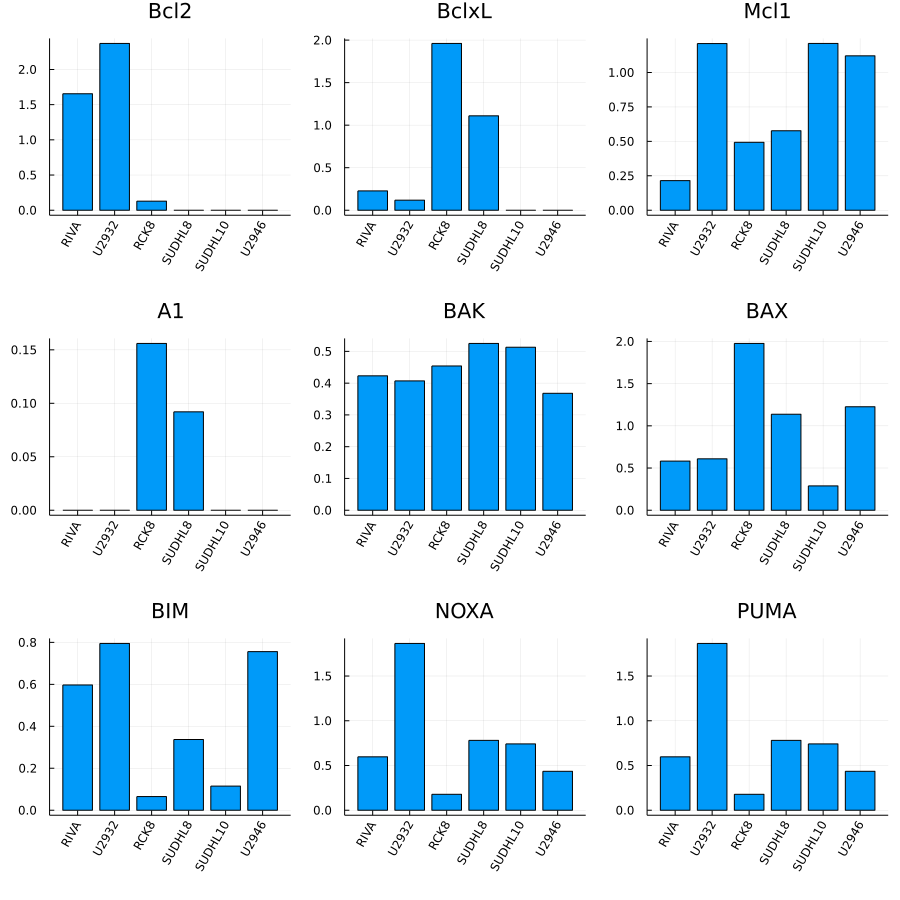

In [6]:
#Plot of binding partners normalised wrt Bcl2
plot(bar(df3t.Cell,df3t.Bcl2), bar(df3t.Cell,df3t.BclxL), bar(df3t.Cell,df3t.Mcl1), bar(df3t.Cell,df3t.A1),
    bar(df3t.Cell,df3t.BAK), bar(df3t.Cell,df3t.BAX), bar(df3t.Cell,df3t.BIM), bar(df3t.Cell,df3t.NOXA),
    bar(df3t.Cell,df3t.NOXA), xrotation=60, legend = false, 
    title = ["Bcl2" "BclxL" "Mcl1" "A1" "BAK" "BAX" "BIM" "NOXA" "PUMA"],
    layout = (3,3), size = (900,900))

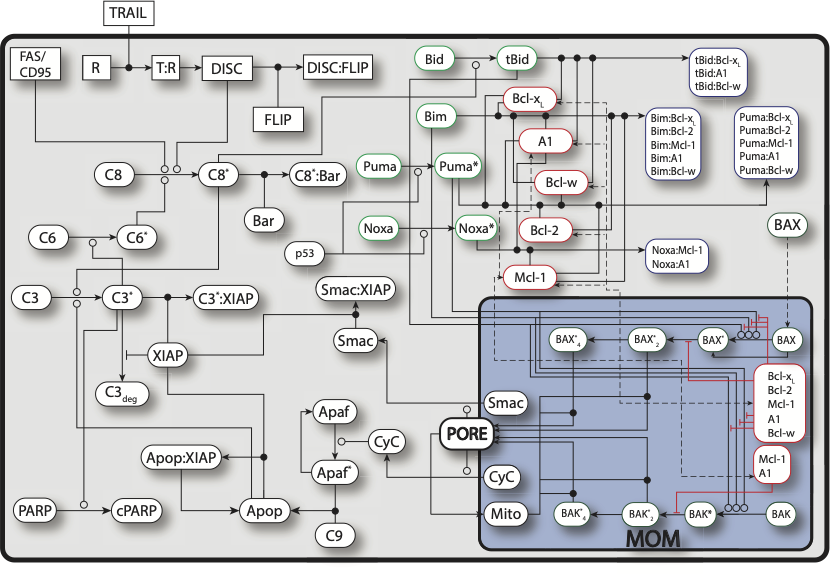

In [7]:
#Updated model schematic
display("image/png", read("images/Updated_apoptosis_model.png"))

In [8]:
#set up where CSV2Julia is
locationOfCSV2Julia="../CSV2JuliaDiffEq-master/csv2model.py"

"../CSV2JuliaDiffEq-master/csv2model.py"

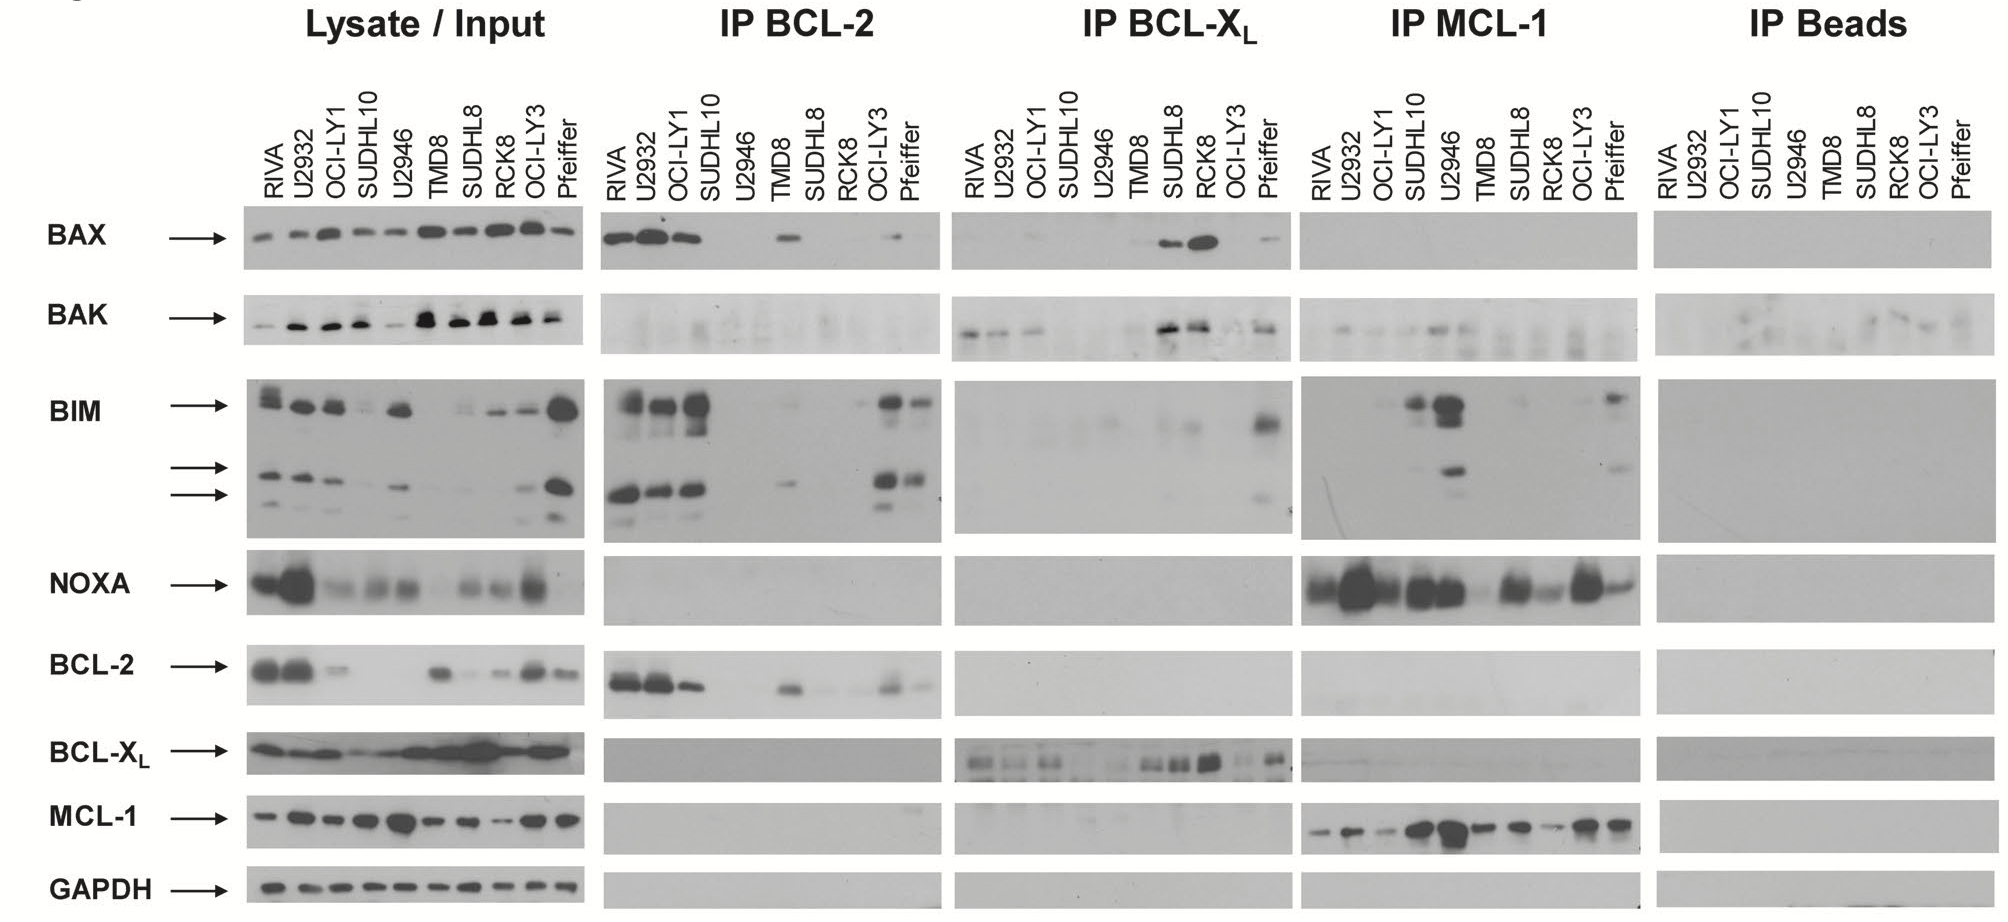

In [9]:
display("image/png",read("images/Bcl2_IP.png"))

In [10]:
#Binding data extracted from western blot using ImageJ
df2 = DataFrame(CSV.File("../multiscale-bcell-master/Apoptosis_modelFiles/Bcl2_IP.csv"))

,Protein,RIVA,U2932,SUDHL8,RCK8,SUDHL10,U2946
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,BAX,2531.39,2988.92,1252.56,2435.04,0.0,0.0
2,BAK,0.0,0.0,1523.41,951.87,162.728,388.799
3,BIM,2956.28,2269.34,304.92,187.435,1456.41,1200.09
4,NOXA,0.0,0.0,0.0,0.0,6327.08,6536.55
5,Bcl2,2958.82,4122.94,0.0,0.0,0.0,0.0
6,BclxL,0.0,0.0,1327.92,2486.46,0.0,0.0
7,Mcl1,0.0,0.0,0.0,0.0,3215.41,5259.5


In [11]:
#Binding data extracted from western blot using ImageJ
#Normalised
df4 = DataFrame(CSV.File("../multiscale-bcell-master/Apoptosis_modelFiles/Bcl2_IP_Exp_norm.csv"))

,Complex,RIVA,U2932,SUDHL8,RCK8,SUDHL10,U2946
,String,Float64,Float64,Float64,Float64,Float64,Float64
1,BAX_Bcl2,0.334,0.663,0.0,0.0,0.0,0.0
2,BAX_BclxL,0.0,0.0,0.731,2.407,0.0,0.0
3,BAX_Mcl1,0.0,0.0,0.0,0.0,0.0,0.0
4,BAK_Bcl2,0.0,0.0,0.0,0.0,0.0,0.0
5,BAK_BclxL,0.091,0.419,1.557,2.508,0.0,0.0
6,BAK_Mcl1,0.0,0.349,0.0,0.0,0.926,0.538
7,BIM_Bcl2,1.228,1.697,0.0,0.0,0.0,0.0
8,BIM_BclxL,0.0,0.0,0.13,0.677,0.0,0.0
9,BIM_Mcl1,0.0,0.0,0.0,0.0,0.163,1.34


# Bcl2 submodel - RIVA

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RIVA/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0 
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=6000 
   y0[findfirst(isequal("Noxa"),syms)]=7200 
   y0[findfirst(isequal("BclxLc"),syms)]=0 #2800
   y0[findfirst(isequal("Bim"),syms)]=7200 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000 
   y0[findfirst(isequal("Mcl1c"),syms)]=2600
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92 
   y0[findfirst(isequal("Bax"),syms)]=7200 
   y0[findfirst(isequal("MBak"),syms)]=5000 
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")
p=1
maxTimeSS=100.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=10.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RIVA_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl")

f=ODEFunction(odeFile!,syms=syms2)
prob=ODEProblem(f,y0,h,(0,maxTimeTC))
prob=SteadyStateProblem(f,y0)
@timev solss=solve(prob,DynamicSS(Rodas5()));


In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
# y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0

In [ ]:
newInit=y0
newInit[1]=y0[1]+0.01

#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/TC_RIVA01_Bid.csv",df)

In [ ]:
# y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0

In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RIVA_DIS"*string(i)*".csv",df)

    thisMOMP=sol[varIndex,:]
    MOMParray=[MOMParray;thisMOMP']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray=MOMParray[2:end,:];


In [ ]:
# plot and pretify

plot(MOMParray',palette=palette([:blue, :red], length(ligandDoses)), lw=2,labels=string.(ligandDoses'),legendtitle = "DIS",legend=:bottomright)
s=string.(collect(0:8:36))
plot!(xticks = (0:(60*8):(36*60),s), ylabel="MOMP",xlabel="time h",fmt = :png)
png("outputFiles/apoptosis/RIVA_MOMPvT")

## Bcl2 inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RIVA/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0 
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=6000 
   y0[findfirst(isequal("Noxa"),syms)]=7200 
   y0[findfirst(isequal("BclxLc"),syms)]=0 #2800
   y0[findfirst(isequal("Bim"),syms)]=7200 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000 
   y0[findfirst(isequal("Mcl1c"),syms)]=2600
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92 
   y0[findfirst(isequal("Bax"),syms)]=7200 
   y0[findfirst(isequal("MBak"),syms)]=5000 
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")
p=1
maxTimeSS=100.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0.5


#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=10.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RIVA_IE_Bcl2_05.csv",dfss);
print("Steady state found\n")

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
# y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0.9

In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_Bcl2_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RIVA_Bcl2_05_DIS"*string(i)*".csv",df)

    thisMOMP_Bcl2_05=sol[varIndex,:]
    MOMParray_Bcl2_05=[MOMParray_Bcl2_05;thisMOMP_Bcl2_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_Bcl2_05=MOMParray_Bcl2_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RIVA/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0 
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=6000 
   y0[findfirst(isequal("Noxa"),syms)]=7200 
   y0[findfirst(isequal("BclxLc"),syms)]=0 #2800
   y0[findfirst(isequal("Bim"),syms)]=7200 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000 
   y0[findfirst(isequal("Mcl1c"),syms)]=2600
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92 
   y0[findfirst(isequal("Bax"),syms)]=7200 
   y0[findfirst(isequal("MBak"),syms)]=5000 
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")
p=1
maxTimeSS=100.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=10.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RIVA_IE_Bcl2_0.csv",dfss);
print("Steady state found\n")

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_Bcl2_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RIVA_Bcl2_0_DIS"*string(i)*".csv",df)

    thisMOMP_Bcl2_0=sol[varIndex,:]
    MOMParray_Bcl2_0=[MOMParray_Bcl2_0;thisMOMP_Bcl2_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_Bcl2_0=MOMParray_Bcl2_0[2:end,:];


In [ ]:
DEATHarray=MOMParray[:,end];
DEATHarray_Bcl2_0=MOMParray_Bcl2_0[:,end];
DEATHarray_Bcl2_05=MOMParray_Bcl2_05[:,end];

In [ ]:
# plot(ligandDoses[1:end],DEATHarray, lw=2,label="RIVA_WT")
# plot!(ligandDoses[1:end],DEATHarray_Bcl2_05, lw=2,label="50% Bcl2 inhib")
# plot!(ligandDoses[1:end],DEATHarray_Bcl2_0, lw=2,label="100% Bcl2 inhib")
# plot!(xlabel="DIS", ylabel="MOMP", legend=:bottomright)

# Bcl-xL inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RIVA/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0 
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=6000 
   y0[findfirst(isequal("Noxa"),syms)]=7200 
   y0[findfirst(isequal("BclxLc"),syms)]=0 #2800
   y0[findfirst(isequal("Bim"),syms)]=7200 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000 
   y0[findfirst(isequal("Mcl1c"),syms)]=2600
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92 
   y0[findfirst(isequal("Bax"),syms)]=7200 
   y0[findfirst(isequal("MBak"),syms)]=5000 
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")
p=1
maxTimeSS=100.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=10.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RIVA_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_BclxL_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RIVA_BclxL_05_DIS"*string(i)*".csv",df)

    thisMOMP_BclxL_05=sol[varIndex,:]
    MOMParray_BclxL_05=[MOMParray_BclxL_05;thisMOMP_BclxL_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_BclxL_05=MOMParray_BclxL_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RIVA/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0 
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=6000 
   y0[findfirst(isequal("Noxa"),syms)]=7200 
   y0[findfirst(isequal("BclxLc"),syms)]=0 #2800
   y0[findfirst(isequal("Bim"),syms)]=7200 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000 
   y0[findfirst(isequal("Mcl1c"),syms)]=2600
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92 
   y0[findfirst(isequal("Bax"),syms)]=7200 
   y0[findfirst(isequal("MBak"),syms)]=5000 
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1

   return y0
end


In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=10.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RIVA_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_BclxL_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RIVA_BclxL_0_DIS"*string(i)*".csv",df)

    thisMOMP_BclxL_0=sol[varIndex,:]
    MOMParray_BclxL_0=[MOMParray_BclxL_0;thisMOMP_BclxL_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_BclxL_0=MOMParray_BclxL_0[2:end,:];


In [ ]:
# DEATHarray=MOMParray[:,end];
DEATHarray_BclxL_0=MOMParray_BclxL_0[:,end];
DEATHarray_BclxL_05=MOMParray_BclxL_05[:,end];

# Mcl1 inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RIVA/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0 
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=6000 
   y0[findfirst(isequal("Noxa"),syms)]=7200 
   y0[findfirst(isequal("BclxLc"),syms)]=0 #2800
   y0[findfirst(isequal("Bim"),syms)]=7200 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000 
   y0[findfirst(isequal("Mcl1c"),syms)]=2600
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92 
   y0[findfirst(isequal("Bax"),syms)]=7200 
   y0[findfirst(isequal("MBak"),syms)]=5000 
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")
p=1
maxTimeSS=100.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=10.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RIVA_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_Mcl1_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RIVA_BclxL_05_DIS"*string(i)*".csv",df)

    thisMOMP_Mcl1_05=sol[varIndex,:]
    MOMParray_Mcl1_05=[MOMParray_Mcl1_05;thisMOMP_Mcl1_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_Mcl1_05=MOMParray_Mcl1_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_RIVA/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RIVA/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0 
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=6000 
   y0[findfirst(isequal("Noxa"),syms)]=7200 
   y0[findfirst(isequal("BclxLc"),syms)]=0 #2800
   y0[findfirst(isequal("Bim"),syms)]=7200 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000 
   y0[findfirst(isequal("Mcl1c"),syms)]=2600
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92 
   y0[findfirst(isequal("Bax"),syms)]=7200 
   y0[findfirst(isequal("MBak"),syms)]=5000 
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1

   return y0
end


In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RIVA/odeApoptosis.jl","modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RIVA/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=10.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RIVA_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RIVA/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_Mcl1_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RIVA_BclxL_0_DIS"*string(i)*".csv",df)

    thisMOMP_Mcl1_0=sol[varIndex,:]
    MOMParray_Mcl1_0=[MOMParray_Mcl1_0;thisMOMP_Mcl1_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_Mcl1_0=MOMParray_Mcl1_0[2:end,:];


In [ ]:
# DEATHarray=MOMParray[:,end];
DEATHarray_Mcl1_0=MOMParray_Mcl1_0[:,end];
DEATHarray_Mcl1_05=MOMParray_Mcl1_05[:,end];

In [ ]:
plot(ligandDoses[1:end],DEATHarray, lw=2,label="RIVA_WT")
plot!(ligandDoses[1:end],DEATHarray_BclxL_05, lw=2,label="50% BclxL inhib")
plot!(ligandDoses[1:end],DEATHarray_BclxL_0, lw=2,label="100% BclxL inhib")
plot!(ligandDoses[1:end],DEATHarray_Mcl1_05, lw=2,label="50% Mcl1 inhib")
plot!(ligandDoses[1:end],DEATHarray_Mcl1_0, lw=2,label="100% Mcl1 inhib")
plot!(ligandDoses[1:end],DEATHarray_Bcl2_05, lw=2,label="50% Bcl2 inhib")
plot!(ligandDoses[1:end],DEATHarray_Bcl2_0, lw=2,label="100% Bcl2 inhib")
plot!(xlabel="log(DIS)", ylabel="log(MOMP)", title="RIVA", legend=:bottomright)#, xaxis=:log, yaxis=:log)
# png("outputFiles/apoptosis/RIVA_MOMPvDISlog")

# Bcl2 submodel - U2932

In [13]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_U2932/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python3 $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_U2932/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl", force=true);

inline
Running CSV2JuliaDiffEq with parameters hard-coded into the CSV file, if this is not correct, re-run with the 5th argument set to 'scan' or 'param'
Opening moduleDefinitionFiles/Apop_Bcl2_U2932/rateLaws.csv as rate law file
Opening moduleDefinitionFiles/Apop_Bcl2_U2932/parameters.csv as parameters file
Opening moduleDefinitionFiles/Apop_Bcl2_U2932/reactions.csv as reactions file


In [14]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=1000
   y0[findfirst(isequal("Bax"),syms)]=5200
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6800 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Mcl1c"),syms)]=10200 
   y0[findfirst(isequal("Puma"),syms)]=2200
   y0[findfirst(isequal("Noxa"),syms)]=15800
   y0[findfirst(isequal("MBak"),syms)]=3400 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

initConditionsApop (generic function with 1 method)

In [15]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [16]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl",1)

In [17]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_U2932_IE.csv",dfss);
print("Steady state found\n")

LoadError: UndefVarError: odeFile! not defined

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5

In [ ]:
newInit=y0
newInit[1]=y0[1]+0.01

#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_U293201_Bid_Mcl1_05.csv",df)

In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_U2932=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_U2932_DIS"*string(i)*".csv",df)

    thisMOMP_U2932=sol[varIndex,:]
    MOMParray_U2932=[MOMParray_U2932;thisMOMP_U2932']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_U2932=MOMParray_U2932[2:end,:];


In [ ]:
# plot and pretify

plot(MOMParray_U2932',palette=palette([:blue, :red], length(ligandDoses)), lw=2,labels=string.(ligandDoses'),legendtitle = "DIS",legend=:bottomright)
s=string.(collect(0:8:36))
plot!(xticks = (0:(60*8):(36*60),s), ylabel="MOMP",xlabel="time h",fmt = :png)
png("outputFiles/apoptosis/U2932_MOMPvT")

# Bcl2 inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_U2932/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_U2932/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=1000
   y0[findfirst(isequal("Bax"),syms)]=5200
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6800 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Mcl1c"),syms)]=10200 
   y0[findfirst(isequal("Puma"),syms)]=2200
   y0[findfirst(isequal("Noxa"),syms)]=15800
   y0[findfirst(isequal("MBak"),syms)]=3400 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_U2932_IE_Bcl2_05.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_U2932_Bcl2_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_U2932_Bcl2_05_DIS"*string(i)*".csv",df)

    thisMOMP_U2932_Bcl2_05=sol[varIndex,:]
    MOMParray_U2932_Bcl2_05=[MOMParray_U2932_Bcl2_05;thisMOMP_U2932_Bcl2_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_U2932_Bcl2_05=MOMParray_U2932_Bcl2_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_U2932/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_U2932/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=1000
   y0[findfirst(isequal("Bax"),syms)]=5200
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6800 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Mcl1c"),syms)]=10200 
   y0[findfirst(isequal("Puma"),syms)]=2200
   y0[findfirst(isequal("Noxa"),syms)]=15800
   y0[findfirst(isequal("MBak"),syms)]=3400 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_U2932_IE_Bcl2_0.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_U2932_Bcl2_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_U2932_Bcl2_0_DIS"*string(i)*".csv",df)

    thisMOMP_U2932_Bcl2_0=sol[varIndex,:]
    MOMParray_U2932_Bcl2_0=[MOMParray_U2932_Bcl2_0;thisMOMP_U2932_Bcl2_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_U2932_Bcl2_0=MOMParray_U2932_Bcl2_0[2:end,:];


In [ ]:
DEATHarray_U2932=MOMParray_U2932[:,end];
DEATHarray_U2932_Bcl2_0=MOMParray_U2932_Bcl2_0[:,end];
DEATHarray_U2932_Bcl2_05=MOMParray_U2932_Bcl2_05[:,end];

# BclxL inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_U2932/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_U2932/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=1000
   y0[findfirst(isequal("Bax"),syms)]=5200
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6800 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Mcl1c"),syms)]=10200 
   y0[findfirst(isequal("Puma"),syms)]=2200
   y0[findfirst(isequal("Noxa"),syms)]=15800
   y0[findfirst(isequal("MBak"),syms)]=3400 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_U2932_IE_BclxL_05.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_U2932_BclxL_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_U2932_BclxL_05_DIS"*string(i)*".csv",df)

    thisMOMP_U2932_BclxL_05=sol[varIndex,:]
    MOMParray_U2932_BclxL_05=[MOMParray_U2932_BclxL_05;thisMOMP_U2932_BclxL_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_U2932_BclxL_05=MOMParray_U2932_BclxL_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_U2932/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_U2932/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=1000
   y0[findfirst(isequal("Bax"),syms)]=5200
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6800 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Mcl1c"),syms)]=10200 
   y0[findfirst(isequal("Puma"),syms)]=2200
   y0[findfirst(isequal("Noxa"),syms)]=15800
   y0[findfirst(isequal("MBak"),syms)]=3400 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_U2932_IE_BclxL_0.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_U2932_BclxL_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_U2932_BclxL_0_DIS"*string(i)*".csv",df)

    thisMOMP_U2932_BclxL_0=sol[varIndex,:]
    MOMParray_U2932_BclxL_0=[MOMParray_U2932_BclxL_0;thisMOMP_U2932_BclxL_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_U2932_BclxL_0=MOMParray_U2932_BclxL_0[2:end,:];


In [ ]:
DEATHarray_U2932_BclxL_0=MOMParray_U2932_BclxL_0[:,end];
DEATHarray_U2932_BclxL_05=MOMParray_U2932_BclxL_05[:,end];

# Mcl1 inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_U2932/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_U2932/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=1000
   y0[findfirst(isequal("Bax"),syms)]=5200
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6800 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Mcl1c"),syms)]=10200 
   y0[findfirst(isequal("Puma"),syms)]=2200
   y0[findfirst(isequal("Noxa"),syms)]=15800
   y0[findfirst(isequal("MBak"),syms)]=3400 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_U2932_IE_Mcl1_05.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_U2932_Mcl1_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_U2932_Mcl1_05_DIS"*string(i)*".csv",df)

    thisMOMP_U2932_Mcl1_05=sol[varIndex,:]
    MOMParray_U2932_Mcl1_05=[MOMParray_U2932_Mcl1_05;thisMOMP_U2932_Mcl1_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_U2932_Mcl1_05=MOMParray_U2932_Mcl1_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/reactions.csv"
parametersFile="moduleDefinitionFiles/Apop_Bcl2_U2932/parameters.csv"
rateLawsFile="moduleDefinitionFiles/Apop_Bcl2_U2932/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_U2932/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=1000
   y0[findfirst(isequal("Bax"),syms)]=5200
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6800 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Mcl1c"),syms)]=10200 
   y0[findfirst(isequal("Puma"),syms)]=2200
   y0[findfirst(isequal("Noxa"),syms)]=15800
   y0[findfirst(isequal("MBak"),syms)]=3400 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_U2932/odeApoptosis.jl","modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_U2932/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_U2932_IE_Mcl1_0.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_U2932/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_U2932_Mcl1_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_U2932_Mcl1_0_DIS"*string(i)*".csv",df)

    thisMOMP_U2932_Mcl1_0=sol[varIndex,:]
    MOMParray_U2932_Mcl1_0=[MOMParray_U2932_Mcl1_0;thisMOMP_U2932_Mcl1_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_U2932_Mcl1_0=MOMParray_U2932_Mcl1_0[2:end,:];


In [ ]:
DEATHarray_U2932_Mcl1_0=MOMParray_U2932_Mcl1_0[:,end];
DEATHarray_U2932_Mcl1_05=MOMParray_U2932_Mcl1_05[:,end];

In [ ]:
plot(ligandDoses[1:end],DEATHarray_U2932, lw=2,label="U2932_WT")
plot!(ligandDoses[1:end],DEATHarray_U2932_BclxL_05, lw=2,label="50% BclxL inhib")
plot!(ligandDoses[1:end],DEATHarray_U2932_BclxL_0, lw=2,label="100% BclxL inhib")
plot!(ligandDoses[1:end],DEATHarray_U2932_Mcl1_05, lw=2,label="50% Mcl1 inhib")
plot!(ligandDoses[1:end],DEATHarray_U2932_Mcl1_0, lw=2,label="100% Mcl1 inhib")
plot!(ligandDoses[1:end],DEATHarray_U2932_Bcl2_05, lw=2,label="50% Bcl2 inhib")
plot!(ligandDoses[1:end],DEATHarray_U2932_Bcl2_0, lw=2,label="100% Bcl2 inhib")
plot!(xlabel="DIS", ylabel="MOMP", title="U2932", legend=:bottomright)
# png("outputFiles/apoptosis/U2932_MOMPvDIS")

# Bcl2 submodel - RCK8

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_RCK8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RCK8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=3600 
   y0[findfirst(isequal("Noxa"),syms)]=1800 
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bim"),syms)]=2000 
   y0[findfirst(isequal("Mcl1c"),syms)]=5000
   y0[findfirst(isequal("A1c"),syms)]=1600
   y0[findfirst(isequal("Bcl2c"),syms)]=1400
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=69 
   y0[findfirst(isequal("Bax"),syms)]=14200 
   y0[findfirst(isequal("MBak"),syms)]=4600 
   y0[findfirst(isequal("Mito"),syms)]=500000 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RCK8_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0

In [ ]:
newInit=y0
newInit[1]=y0[1]+0.01

#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_RCK801_Bid_Mcl1_0.csv",df)

In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_RCK8=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RCK8_DIS"*string(i)*".csv",df)

    thisMOMP_RCK8=sol[varIndex,:]
    MOMParray_RCK8=[MOMParray_RCK8;thisMOMP_RCK8']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_RCK8=MOMParray_RCK8[2:end,:];


In [ ]:
# plot and pretify

plot(MOMParray_RCK8',palette=palette([:blue, :red], length(ligandDoses)), lw=2,labels=string.(ligandDoses'),legendtitle = "DIS",legend=:bottomright)
s=string.(collect(0:8:36))
plot!(xticks = (0:(60*8):(36*60),s), ylabel="MOMP",xlabel="time h",fmt = :png)
png("outputFiles/apoptosis/RCK8_MOMPvT")

# Bcl2 inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_RCK8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RCK8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=3600 
   y0[findfirst(isequal("Noxa"),syms)]=1800 
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bim"),syms)]=2000 
   y0[findfirst(isequal("Mcl1c"),syms)]=5000
   y0[findfirst(isequal("A1c"),syms)]=1600
   y0[findfirst(isequal("Bcl2c"),syms)]=1400
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=69 
   y0[findfirst(isequal("Bax"),syms)]=14200 
   y0[findfirst(isequal("MBak"),syms)]=4600 
   y0[findfirst(isequal("Mito"),syms)]=500000 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RCK8_Bcl2_05_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_RCK8_Bcl2_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RCK8_Bcl2_05_DIS"*string(i)*".csv",df)

    thisMOMP_RCK8_Bcl2_05=sol[varIndex,:]
    MOMParray_RCK8_Bcl2_05=[MOMParray_RCK8_Bcl2_05;thisMOMP_RCK8_Bcl2_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_RCK8_Bcl2_05=MOMParray_RCK8_Bcl2_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_RCK8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RCK8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=3600 
   y0[findfirst(isequal("Noxa"),syms)]=1800 
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bim"),syms)]=2000 
   y0[findfirst(isequal("Mcl1c"),syms)]=5000
   y0[findfirst(isequal("A1c"),syms)]=1600
   y0[findfirst(isequal("Bcl2c"),syms)]=1400
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=69 
   y0[findfirst(isequal("Bax"),syms)]=14200 
   y0[findfirst(isequal("MBak"),syms)]=4600 
   y0[findfirst(isequal("Mito"),syms)]=500000 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RCK8_Bcl2_0_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_RCK8_Bcl2_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RCK8_Bcl2_0_DIS"*string(i)*".csv",df)

    thisMOMP_RCK8_Bcl2_0=sol[varIndex,:]
    MOMParray_RCK8_Bcl2_0=[MOMParray_RCK8_Bcl2_0;thisMOMP_RCK8_Bcl2_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_RCK8_Bcl2_0=MOMParray_RCK8_Bcl2_0[2:end,:];


In [ ]:
DEATHarray_RCK8=MOMParray_RCK8[:,end];
DEATHarray_RCK8_Bcl2_0=MOMParray_RCK8_Bcl2_0[:,end];
DEATHarray_RCK8_Bcl2_05=MOMParray_RCK8_Bcl2_05[:,end];

# BclxL inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_RCK8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RCK8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=3600 
   y0[findfirst(isequal("Noxa"),syms)]=1800 
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bim"),syms)]=2000 
   y0[findfirst(isequal("Mcl1c"),syms)]=5000
   y0[findfirst(isequal("A1c"),syms)]=1600
   y0[findfirst(isequal("Bcl2c"),syms)]=1400
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=69 
   y0[findfirst(isequal("Bax"),syms)]=14200 
   y0[findfirst(isequal("MBak"),syms)]=4600 
   y0[findfirst(isequal("Mito"),syms)]=500000 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RCK8_BclxL_05_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_RCK8_BclxL_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RCK8_BclxL_05_DIS"*string(i)*".csv",df)

    thisMOMP_RCK8_BclxL_05=sol[varIndex,:]
    MOMParray_RCK8_BclxL_05=[MOMParray_RCK8_BclxL_05;thisMOMP_RCK8_BclxL_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_RCK8_BclxL_05=MOMParray_RCK8_BclxL_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_RCK8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RCK8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=3600 
   y0[findfirst(isequal("Noxa"),syms)]=1800 
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bim"),syms)]=2000 
   y0[findfirst(isequal("Mcl1c"),syms)]=5000
   y0[findfirst(isequal("A1c"),syms)]=1600
   y0[findfirst(isequal("Bcl2c"),syms)]=1400
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=69 
   y0[findfirst(isequal("Bax"),syms)]=14200 
   y0[findfirst(isequal("MBak"),syms)]=4600 
   y0[findfirst(isequal("Mito"),syms)]=500000 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RCK8_BclxL_0_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_RCK8_BclxL_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RCK8_BclxL_0_DIS"*string(i)*".csv",df)

    thisMOMP_RCK8_BclxL_0=sol[varIndex,:]
    MOMParray_RCK8_BclxL_0=[MOMParray_RCK8_BclxL_0;thisMOMP_RCK8_BclxL_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_RCK8_BclxL_0=MOMParray_RCK8_BclxL_0[2:end,:];


In [ ]:
DEATHarray_RCK8_BclxL_0=MOMParray_RCK8_BclxL_0[:,end];
DEATHarray_RCK8_BclxL_05=MOMParray_RCK8_BclxL_05[:,end];

# Mcl1 inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_RCK8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RCK8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=3600 
   y0[findfirst(isequal("Noxa"),syms)]=1800 
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bim"),syms)]=2000 
   y0[findfirst(isequal("Mcl1c"),syms)]=5000
   y0[findfirst(isequal("A1c"),syms)]=1600
   y0[findfirst(isequal("Bcl2c"),syms)]=1400
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=69 
   y0[findfirst(isequal("Bax"),syms)]=14200 
   y0[findfirst(isequal("MBak"),syms)]=4600 
   y0[findfirst(isequal("Mito"),syms)]=500000 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RCK8_Mcl1_05_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_RCK8_Mcl1_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RCK8_Mcl1_05_DIS"*string(i)*".csv",df)

    thisMOMP_RCK8_Mcl1_05=sol[varIndex,:]
    MOMParray_RCK8_Mcl1_05=[MOMParray_RCK8_Mcl1_05;thisMOMP_RCK8_Mcl1_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_RCK8_Mcl1_05=MOMParray_RCK8_Mcl1_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_RCK8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_RCK8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_RCK8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Puma"),syms)]=3600 
   y0[findfirst(isequal("Noxa"),syms)]=1800 
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bim"),syms)]=2000 
   y0[findfirst(isequal("Mcl1c"),syms)]=5000
   y0[findfirst(isequal("A1c"),syms)]=1600
   y0[findfirst(isequal("Bcl2c"),syms)]=1400
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=69 
   y0[findfirst(isequal("Bax"),syms)]=14200 
   y0[findfirst(isequal("MBak"),syms)]=4600 
   y0[findfirst(isequal("Mito"),syms)]=500000 
   y0[findfirst(isequal("Inhib_eff_Bcl2"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_RCK8/odeApoptosis.jl","modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_RCK8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_RCK8_Mcl1_0_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_RCK8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_RCK8_Mcl1_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_RCK8_Mcl1_0_DIS"*string(i)*".csv",df)

    thisMOMP_RCK8_Mcl1_0=sol[varIndex,:]
    MOMParray_RCK8_Mcl1_0=[MOMParray_RCK8_Mcl1_0;thisMOMP_RCK8_Mcl1_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_RCK8_Mcl1_0=MOMParray_RCK8_Mcl1_0[2:end,:];


In [ ]:
DEATHarray_RCK8_Mcl1_0=MOMParray_RCK8_Mcl1_0[:,end];
DEATHarray_RCK8_Mcl1_05=MOMParray_RCK8_Mcl1_05[:,end];

In [ ]:
plot(ligandDoses[1:end],DEATHarray_RCK8, lw=2,label="RCK8_WT")
plot!(ligandDoses[1:end],DEATHarray_RCK8_BclxL_05, lw=2,label="50% BclxL inhib")
plot!(ligandDoses[1:end],DEATHarray_RCK8_BclxL_0, lw=2,label="100% BclxL inhib")
plot!(ligandDoses[1:end],DEATHarray_RCK8_Mcl1_05, lw=2,label="50% Mcl1 inhib")
plot!(ligandDoses[1:end],DEATHarray_RCK8_Mcl1_0, lw=2,label="100% Mcl1 inhib")
plot!(ligandDoses[1:end],DEATHarray_RCK8_Bcl2_05, lw=2,label="50% Bcl2 inhib")
plot!(ligandDoses[1:end],DEATHarray_RCK8_Bcl2_0, lw=2,label="100% Bcl2 inhib")
plot!(xlabel="log(DIS)", ylabel="log(MOMP)", title="RCK8", legend=:bottomright, xaxis=:log, yaxis=:log)
# png("outputFiles/apoptosis/RCK8_MOMPvDISlog")

# Bcl2 submodel - SUDHL8

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_SUDHL8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bax"),syms)]=22000
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
   y0[findfirst(isequal("A1c"),syms)]=1600 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6000 
   y0[findfirst(isequal("Mcl1c"),syms)]=10400 
   y0[findfirst(isequal("Puma"),syms)]=1600
   y0[findfirst(isequal("MBak"),syms)]=9400 
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_SUDHL8_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5

In [ ]:
newInit=y0
newInit[1]=y0[1]+0.01

#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_SUDHL801_Bid_Mcl1_05.csv",df)

In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_SUDHL8=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_SUDHL8_DIS"*string(i)*".csv",df)

    thisMOMP_SUDHL8=sol[varIndex,:]
    MOMParray_SUDHL8=[MOMParray_SUDHL8;thisMOMP_SUDHL8']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_SUDHL8=MOMParray_SUDHL8[2:end,:];


In [ ]:
# plot and pretify

plot(MOMParray_SUDHL8',palette=palette([:blue, :red], length(ligandDoses)), lw=2,labels=string.(ligandDoses'),legendtitle = "DIS",legend=:bottomright)
s=string.(collect(0:8:36))
plot!(xticks = (0:(60*8):(36*60),s), ylabel="MOMP",xlabel="time h",fmt = :png)
png("outputFiles/apoptosis/SUDHL8_MOMPvT")

# BclxL inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_SUDHL8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bax"),syms)]=22000
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
   y0[findfirst(isequal("A1c"),syms)]=1600 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6000 
   y0[findfirst(isequal("Mcl1c"),syms)]=10400 
   y0[findfirst(isequal("Puma"),syms)]=1600
   y0[findfirst(isequal("MBak"),syms)]=9400 
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_SUDHL8)_BclxL_05_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_SUDHL8_BclxL_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_SUDHL8_BclxL_05_DIS"*string(i)*".csv",df)

    thisMOMP_SUDHL8_BclxL_05=sol[varIndex,:]
    MOMParray_SUDHL8_BclxL_05=[MOMParray_SUDHL8_BclxL_05;thisMOMP_SUDHL8_BclxL_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_SUDHL8_BclxL_05=MOMParray_SUDHL8_BclxL_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_SUDHL8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bax"),syms)]=22000
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
   y0[findfirst(isequal("A1c"),syms)]=1600 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6000 
   y0[findfirst(isequal("Mcl1c"),syms)]=10400 
   y0[findfirst(isequal("Puma"),syms)]=1600
   y0[findfirst(isequal("MBak"),syms)]=9400 
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_SUDHL8)_BclxL_0_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_SUDHL8_BclxL_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_SUDHL8_BclxL_0_DIS"*string(i)*".csv",df)

    thisMOMP_SUDHL8_BclxL_0=sol[varIndex,:]
    MOMParray_SUDHL8_BclxL_0=[MOMParray_SUDHL8_BclxL_0;thisMOMP_SUDHL8_BclxL_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_SUDHL8_BclxL_0=MOMParray_SUDHL8_BclxL_0[2:end,:];


In [ ]:
DEATHarray_SUDHL8=MOMParray_SUDHL8[:,end];
DEATHarray_SUDHL8_BclxL_0=MOMParray_SUDHL8_BclxL_0[:,end];
DEATHarray_SUDHL8_BclxL_05=MOMParray_SUDHL8_BclxL_05[:,end];

# Mcl1 inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_SUDHL8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bax"),syms)]=22000
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
   y0[findfirst(isequal("A1c"),syms)]=1600 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6000 
   y0[findfirst(isequal("Mcl1c"),syms)]=10400 
   y0[findfirst(isequal("Puma"),syms)]=1600
   y0[findfirst(isequal("MBak"),syms)]=9400 
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_SUDHL8)_Mcl1_05_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_SUDHL8_Mcl1_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_SUDHL8_Mcl1_05_DIS"*string(i)*".csv",df)

    thisMOMP_SUDHL8_Mcl1_05=sol[varIndex,:]
    MOMParray_SUDHL8_Mcl1_05=[MOMParray_SUDHL8_Mcl1_05;thisMOMP_SUDHL8_Mcl1_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_SUDHL8_Mcl1_05=MOMParray_SUDHL8_Mcl1_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_SUDHL8/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bax"),syms)]=22000
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
   y0[findfirst(isequal("A1c"),syms)]=1600 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6000 
   y0[findfirst(isequal("Mcl1c"),syms)]=10400 
   y0[findfirst(isequal("Puma"),syms)]=1600
   y0[findfirst(isequal("MBak"),syms)]=9400 
   y0[findfirst(isequal("Inhib_eff_BclxL"),syms)]=1
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_SUDHL8/odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL8/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_SUDHL8)_Mcl1_0_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_SUDHL8/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_SUDHL8_Mcl1_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_SUDHL8_Mcl1_0_DIS"*string(i)*".csv",df)

    thisMOMP_SUDHL8_Mcl1_0=sol[varIndex,:]
    MOMParray_SUDHL8_Mcl1_0=[MOMParray_SUDHL8_Mcl1_0;thisMOMP_SUDHL8_Mcl1_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_SUDHL8_Mcl1_0=MOMParray_SUDHL8_Mcl1_0[2:end,:];


In [ ]:
DEATHarray_SUDHL8_Mcl1_0=MOMParray_SUDHL8_Mcl1_0[:,end];
DEATHarray_SUDHL8_Mcl1_05=MOMParray_SUDHL8_Mcl1_05[:,end];

In [ ]:
plot(ligandDoses[1:end],DEATHarray_SUDHL8, lw=2,label="SUDHL8_WT")
plot!(ligandDoses[1:end],DEATHarray_SUDHL8_BclxL_05, lw=2,label="50% BclxL inhib")
plot!(ligandDoses[1:end],DEATHarray_SUDHL8_BclxL_0, lw=2,label="100% BclxL inhib")
plot!(ligandDoses[1:end],DEATHarray_SUDHL8_Mcl1_05, lw=2,label="50% Mcl1 inhib")
plot!(ligandDoses[1:end],DEATHarray_SUDHL8_Mcl1_0, lw=2,label="100% Mcl1 inhib")
plot!(xlabel="DIS", ylabel="MOMP", title="SUDHL8", legend=:bottomright)
# png("outputFiles/apoptosis/SUDHL8_MOMPvDIS")

# Bcl2 submodel - SUDHL10

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL10/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_SUDHL10/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL10/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_SUDHL10/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL10/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_SUDHL10/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0 
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Bax"),syms)]=6400
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=277
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=2000
   y0[findfirst(isequal("Mcl1c"),syms)]=20000
   y0[findfirst(isequal("Noxa"),syms)]=12200
   y0[findfirst(isequal("MBak"),syms)]=8400 
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL10/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_SUDHL10/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_SUDHL10/odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL10/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL10/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
# solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_SUDHL10_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_SUDHL10/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
# y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0

In [ ]:
newInit=y0
newInit[1]=y0[1]+0.01

#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_SUDHL1001_Mcl1_0.csv",df)

In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_SUDHL10=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_SUDHL10_DIS"*string(i)*".csv",df)

    thisMOMP_SUDHL10=sol[varIndex,:]
    MOMParray_SUDHL10=[MOMParray_SUDHL10;thisMOMP_SUDHL10']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_SUDHL10=MOMParray_SUDHL10[2:end,:];


In [ ]:
# plot and pretify

plot(MOMParray_SUDHL10',palette=palette([:blue, :red], length(ligandDoses)), lw=2,labels=string.(ligandDoses'),legendtitle = "DIS",legend=:bottomright)
s=string.(collect(0:8:36))
plot!(xticks = (0:(60*8):(36*60),s), ylabel="MOMP",xlabel="time h",fmt = :png)
png("outputFiles/apoptosis/SUDHL10_MOMPvT")

# Mcl1 inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL10/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_SUDHL10/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL10/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_SUDHL10/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL10/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_SUDHL10/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0 
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Bax"),syms)]=6400
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=277
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=2000
   y0[findfirst(isequal("Mcl1c"),syms)]=20000
   y0[findfirst(isequal("Noxa"),syms)]=12200
   y0[findfirst(isequal("MBak"),syms)]=8400 
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL10/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_SUDHL10/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_SUDHL10/odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL10/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL10/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
# solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_SUDHL10_Mcl1_05_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_SUDHL10/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_SUDHL10_Mcl1_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_SUDHL10_Mcl1_05_DIS"*string(i)*".csv",df)

    thisMOMP_SUDHL10_Mcl1_05=sol[varIndex,:]
    MOMParray_SUDHL10_Mcl1_05=[MOMParray_SUDHL10_Mcl1_05;thisMOMP_SUDHL10_Mcl1_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_SUDHL10_Mcl1_05=MOMParray_SUDHL10_Mcl1_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL10/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_SUDHL10/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_SUDHL10/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_SUDHL10/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL10/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_SUDHL10/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("DIS"),syms)]=0 
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Bax"),syms)]=6400
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=277
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=2000
   y0[findfirst(isequal("Mcl1c"),syms)]=20000
   y0[findfirst(isequal("Noxa"),syms)]=12200
   y0[findfirst(isequal("MBak"),syms)]=8400 
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1 

   return y0
end

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL10/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_SUDHL10/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_SUDHL10/odeApoptosis.jl","modelFiles/apop_Bcl2_SUDHL10/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_SUDHL10/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
# solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_SUDHL10_Mcl1_0_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_SUDHL10/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_SUDHL10_Mcl1_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_SUDHL10_Mcl1_0_DIS"*string(i)*".csv",df)

    thisMOMP_SUDHL10_Mcl1_0=sol[varIndex,:]
    MOMParray_SUDHL10_Mcl1_0=[MOMParray_SUDHL10_Mcl1_0;thisMOMP_SUDHL10_Mcl1_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_SUDHL10_Mcl1_0=MOMParray_SUDHL10_Mcl1_0[2:end,:];


In [ ]:
DEATHarray_SUDHL10=MOMParray_SUDHL10[:,end];
DEATHarray_SUDHL10_Mcl1_0=MOMParray_SUDHL10_Mcl1_0[:,end];
DEATHarray_SUDHL10_Mcl1_05=MOMParray_SUDHL10_Mcl1_05[:,end];

In [ ]:
plot(ligandDoses[1:end],DEATHarray_SUDHL10, lw=2,label="SUDHL10_WT")
plot!(ligandDoses[1:end],DEATHarray_SUDHL10_Mcl1_05, lw=2,label="50% Mcl1 inhib")
plot!(ligandDoses[1:end],DEATHarray_SUDHL10_Mcl1_0, lw=2,label="100% Mcl1 inhib")
plot!(xlabel="DIS", ylabel="MOMP", title="SUDHL10", legend=:bottomright)
# png("outputFiles/apoptosis/SUDHL10_MOMPvDIS")

# Bcl2 submodel - U2946

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_U2946/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_U2946/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_U2946/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_U2946/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_U2946/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_U2946/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Bax"),syms)]=15200
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=277 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=13400
   y0[findfirst(isequal("Mcl1c"),syms)]=20000
   y0[findfirst(isequal("Noxa"),syms)]=7800
   y0[findfirst(isequal("MBak"),syms)]=6600 
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_U2946/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_U2946/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_U2946/odeApoptosis.jl","modelFiles/apop_Bcl2_U2946/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_U2946/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_U2946_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_U2946/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0

In [ ]:
newInit=y0
newInit[1]=y0[1]+0.01

#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_U294601_Mcl1_0.csv",df)

In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_U2946=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_U2946_DIS"*string(i)*".csv",df)

    thisMOMP_U2946=sol[varIndex,:]
    MOMParray_U2946=[MOMParray_U2946;thisMOMP_U2946']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_U2946=MOMParray_U2946[2:end,:];


In [ ]:
# plot and pretify

plot(MOMParray_U2946',palette=palette([:blue, :red], length(ligandDoses)), lw=2,labels=string.(ligandDoses'),legendtitle = "DIS",legend=:bottomright)
s=string.(collect(0:8:36))
plot!(xticks = (0:(60*8):(36*60),s), ylabel="MOMP",xlabel="time h",fmt = :png)
png("outputFiles/apoptosis/U2946_MOMPvT")

# Mcl1 inhibition

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_U2946/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_U2946/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_U2946/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_U2946/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_U2946/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_U2946/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Bax"),syms)]=15200
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=277 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=13400
   y0[findfirst(isequal("Mcl1c"),syms)]=20000
   y0[findfirst(isequal("Noxa"),syms)]=7800
   y0[findfirst(isequal("MBak"),syms)]=6600 
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_U2946/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_U2946/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_U2946/odeApoptosis.jl","modelFiles/apop_Bcl2_U2946/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_U2946/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_U2946_Mcl1_05_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_U2946/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_U2946_Mcl1_05=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0.5
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_U2946_Mcl1_05_DIS"*string(i)*".csv",df)

    thisMOMP_U2946_Mcl1_05=sol[varIndex,:]
    MOMParray_U2946_Mcl1_05=[MOMParray_U2946_Mcl1_05;thisMOMP_U2946_Mcl1_05']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_U2946_Mcl1_05=MOMParray_U2946_Mcl1_05[2:end,:];


In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apop_Bcl2_U2946/reactions.csv"
parametersFile="moduleDefinitionFiles/apop_Bcl2_U2946/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apop_Bcl2_U2946/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apop_Bcl2_U2946/")
mv("odeApoptosis.jl","modelFiles/apop_Bcl2_U2946/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apop_Bcl2_U2946/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M 
   y0[findfirst(isequal("DIS"),syms)]=0
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Bax"),syms)]=15200
   y0[findfirst(isequal("Mito"),syms)]=500000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=277 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=13400
   y0[findfirst(isequal("Mcl1c"),syms)]=20000
   y0[findfirst(isequal("Noxa"),syms)]=7800
   y0[findfirst(isequal("MBak"),syms)]=6600 
   y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=1

   return y0
end


In [ ]:
include("modelFiles/apop_Bcl2_U2946/odeApoptosis.jl")
include("modelFiles/apop_Bcl2_U2946/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=24*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apop_Bcl2_U2946/odeApoptosis.jl","modelFiles/apop_Bcl2_U2946/odeApoptosisFixed.jl",1)

In [ ]:
include("modelFiles/apop_Bcl2_U2946/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)
y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,10000.0),abstol=1e-16,reltol=1e-16)
solss=solve(prob,saveat=100.0,progress = true,isoutofdomain=(y,p,t)->any(x->x<0,y))
# solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/SS_Bcl2_U2946_Mcl1_0_IE.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apop_Bcl2_U2946/variableNamesApoptosis.jl")

speciesToPlot="AMito"
varIndex=findfirst(isequal(speciesToPlot),syms)


In [ ]:
ligandDoses=[0.001,0.01,0.1,1,10,20,50,100,500,1000,5000,10000,50000,100000,500000,1000000]

# y0[1]=0
#store all the results in an array to plot at the end, faster than plotting in the loop.
MOMParray_U2946_Mcl1_0=zeros(1,Int(maxTimeTC)+1)

for i in ligandDoses
    y0=vec(convert(Array, dfss[:,end]))
    println("Solving solution with ligand: "*string(i)*"")
    newInit=y0
    newInit[1]=y0[1]+i
    y0[findfirst(isequal("Inhib_eff_Mcl1"),syms)]=0
#     println("Solving solution with ligand: "*string(newInit[1])*"")

    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
#     println("about to solve")
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC),abstol=1e-16,reltol=1e-16,maxiters=1e9)
    sol=solve(prob,saveat=1,progress = true)
#     println("solved")

    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_Bcl2_U2946_Mcl1_0_DIS"*string(i)*".csv",df)

    thisMOMP_U2946_Mcl1_0=sol[varIndex,:]
    MOMParray_U2946_Mcl1_0=[MOMParray_U2946_Mcl1_0;thisMOMP_U2946_Mcl1_0']
#     append!(MOMParray, sol(i))

    
end

#cut off the zero array
MOMParray_U2946_Mcl1_0=MOMParray_U2946_Mcl1_0[2:end,:];


In [ ]:
DEATHarray_U2946=MOMParray_U2946[:,end];
DEATHarray_U2946_Mcl1_0=MOMParray_U2946_Mcl1_0[:,end];
DEATHarray_U2946_Mcl1_05=MOMParray_U2946_Mcl1_05[:,end];

In [ ]:
plot(ligandDoses[1:end],DEATHarray_U2946, lw=2,label="SUDHL10_WT")
plot!(ligandDoses[1:end],DEATHarray_U2946_Mcl1_05, lw=2,label="50% Mcl1 inhib")
plot!(ligandDoses[1:end],DEATHarray_U2946_Mcl1_0, lw=2,label="100% Mcl1 inhib")
plot!(xlabel="DIS", ylabel="MOMP", title="U2946", legend=:bottomright)
# png("outputFiles/apoptosis/U2946_MOMPvDIS")

# RIVA

In [ ]:
#Plot of binding partners normalised wrt Bcl2
plot(bar(df3.Protein,df3.RIVA./1.655), bar(df4.Complex,df4.RIVA./1.924),
    xrotation=60, label = ["Protein abundance" "Binding partners"],
    layout = (1,2), size = (800,300))

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apoptosis_RIVA/reactions.csv"
parametersFile="moduleDefinitionFiles/apoptosis_RIVA/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apoptosis_RIVA/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apoptosis_RIVA/")
mv("odeApoptosis.jl","modelFiles/apoptosis_RIVA/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apoptosis_RIVA/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("L"),syms)]=0
   y0[findfirst(isequal("R"),syms)]=1000
   y0[findfirst(isequal("flip"),syms)]=2000
   y0[findfirst(isequal("pC8"),syms)]=10000
   y0[findfirst(isequal("BAR"),syms)]=1000
   y0[findfirst(isequal("pC3"),syms)]=10000
   y0[findfirst(isequal("pC6"),syms)]=10000
   y0[findfirst(isequal("XIAP"),syms)]=100000
   y0[findfirst(isequal("PARP"),syms)]=1000000
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=2800
   y0[findfirst(isequal("Bax"),syms)]=7200
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("mCytoC"),syms)]=500000
   y0[findfirst(isequal("mSmac"),syms)]=100000
   y0[findfirst(isequal("Apaf"),syms)]=100000
   y0[findfirst(isequal("Procasp9"),syms)]=100000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
   y0[findfirst(isequal("FAS"),syms)]=0 #1500
   y0[findfirst(isequal("Bim"),syms)]=7200
#    y0[findfirst(isequal("Bim"),syms)]=0 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Mcl1c"),syms)]=2600
   y0[findfirst(isequal("p53"),syms)]=50000
#    y0[findfirst(isequal("p53"),syms)]=0 
   y0[findfirst(isequal("Puma"),syms)]=6000
   y0[findfirst(isequal("Noxa"),syms)]=7200
   y0[findfirst(isequal("MBak"),syms)]=5000 
    

   return y0
end

In [ ]:
include("modelFiles/apoptosis_RIVA/odeApoptosis.jl")
include("modelFiles/apoptosis_RIVA/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=36*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apoptosis_RIVA/odeApoptosis.jl","modelFiles/apoptosis_RIVA/odeApoptosisFixed.jl",1)
# FASIndex=findfirst(isequal("FAS"),syms)
# fixSpecies("modelFiles/apoptosis_RIVA/odeApoptosisFixed.jl","modelFiles/apoptosis_RIVA/odeApoptosisFixed.jl",FASIndex)
# BimIndex=findfirst(isequal("Bim"),syms)
# fixSpecies("modelFiles/apoptosis_RIVA/odeApoptosisFixed.jl","modelFiles/apoptosis_RIVA/odeApoptosisFixed.jl",BimIndex)
# p53Index=findfirst(isequal("p53"),syms)
# fixSpecies("modelFiles/apoptosis_RIVA/odeApoptosisFixed.jl","modelFiles/apoptosis_RIVA/odeApoptosisFixed.jl",p53Index)

### Solve the steady state

In [ ]:
include("modelFiles/apoptosis_RIVA/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,100.0))
solss=solve(prob,saveat=1,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/steadyState_RIVA.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
include("modelFiles/apoptosis_RIVA/odeApoptosisFixed.jl")

f=ODEFunction(odeFile!,syms=syms2)
prob=ODEProblem(f,y0,h,(0,maxTimeTC))
prob=SteadyStateProblem(f,y0)
@timev solss=solve(prob,DynamicSS(Rodas5()));


In [ ]:
newInit=y0
newInit[1]=y0[1]+100
# newInit[77]=y0[77]+500000
#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC))
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_RIVA.csv",df)

In [ ]:
# C8in=findfirst(isequal("C8"),syms)
# FASin=findfirst(isequal("FAS"),syms)
# plot(sol[C8in,:])
# # plot!(sol[FASin,:])

In [ ]:
# #reimport variables names because we want a string again not a sym
# include("modelFiles/apoptosis_RIVA/variableNamesApoptosis.jl")

# #find cleaved parp
# speciesToPlot="CPARP"
# #find total PARP
# denominator=["PARP","PARP_C3","CPARP"]
# varIndex=findfirst(isequal(speciesToPlot),syms)
# denominatorIndexes=Array{Int64}(undef,length(denominator))
# for i in 1:length(denominator)
#     thisIndex=findfirst(isequal(denominator[i]),syms)
#     denominatorIndexes[i]=convert(Int64,thisIndex)
# end

In [ ]:
# #store all the results in an array to plot at the end, faster than plotting in the loop.
# cPARPArray=zeros(1,Int(maxTimeTC)+1)

# #calculate cleaved parp as a percentage of total and store in the array.
# thisNumerator=sol[varIndex,:] #cPARP
# thisDemonintorTCs=sol[denominatorIndexes,:]
# thisDemonintor=sum(thisDemonintorTCs,dims=1) #other PARP species
# parpPercentage=thisNumerator./thisDemonintor'
# cPARPArray=[cPARPArray;parpPercentage']


# #cut off the zero array
# cPARPArray=cPARPArray[2:end,:]

# #plot and pretify
# plot(cPARPArray',palette=palette([:blue, :red], 6), lw=2,legendtitle = "TRAIL dose",legend=:bottomright)
#     s=string.(collect(0:12:108))
# plot!(xticks = (0:(60*12):(108*60),s), ylim = (0,1), ylabel="cPARP %",xlabel="time h",fmt = :png)

In [ ]:
# Import timecourse csv for plotting bar charts (probably a better way to do this)
# Plot protein abundances to compare to data

Bcl2_total=sol[67,end]+sol[71,end]
BclxL_total=sol[28,end]+sol[35,end]
Mcl1_total=sol[69,end]+sol[73,end]
A1_total=0
Bim_total=sol[62,end]+sol[63,end]
Puma_total=sol[78,end]+sol[80,end]+sol[81,end]
Noxa_total=sol[89,end]+sol[91,end]+sol[92,end]
Bax_total=sol[34,end]+sol[30,end]+sol[33,end]+sol[37,end]+sol[38,end]
Bak_total=sol[95,end]+sol[97,end]+sol[101,end]+sol[102,end]

Bax_Bcl2=sol[75,end]
Bax_BclxL=sol[36,end]
Bax_Mcl1=sol[76,end]
Bak_Bcl2=0
Bak_BclxL=sol[106,end]
Bak_Mcl1=sol[100,end]
Bim_Bcl2=sol[68,end]+sol[72,end]
Bim_BclxL=sol[65,end]+sol[66,end]
Bim_Mcl1=sol[70,end]+sol[74,end]
Noxa_Mcl1=sol[93,end]+sol[94,end]

Species_1 = ["Bcl2","BclxL","Mcl1","A1","BAK","BAX","Bim","Noxa","Puma"]
Expression = [Bcl2_total/Bcl2_total, BclxL_total/Bcl2_total, Mcl1_total/Bcl2_total, 
            A1_total/Bcl2_total, Bak_total/Bcl2_total, Bax_total/Bcl2_total, 
            Bim_total/Bcl2_total, Noxa_total/Bcl2_total, Puma_total/Bcl2_total]

Species_2 = ["Bax_Bcl2","Bax_BclxL","Bax_Mcl1","Bak_Bcl2","Bak_BclxL","Bak_Mcl1",
    "Bim_Bcl2","Bim_BclxL","Bim_Mcl1","Noxa_Mcl1"]
Bind = [Bax_Bcl2/Bcl2_total, Bax_BclxL/Bcl2_total, Bax_Mcl1/Bcl2_total, 
    Bak_Bcl2/Bcl2_total, Bak_BclxL/Bcl2_total, Bak_Mcl1/Bcl2_total, 
    Bim_Bcl2/Bcl2_total, Bim_BclxL/Bcl2_total, Bim_Mcl1/Bcl2_total, Noxa_Mcl1/Bcl2_total]

plot_RIVA_bind = plot(bar(df3.Protein,df3.RIVA./1.655), bar(Species_1,Expression), 
    bar(df4.Complex,df4.RIVA./1.924), bar(Species_2,Bind), xrotation=60, legend = false,
    ylabel = ["Relative abundance \nnormalised to Bcl2" "" "Binding partner abundance \nnormalised to Bcl2" ""],
    title = ["Protein abundance (data)" "Protein abundance (sim)" "Binding partners (data)" "Binding partners (sim)"],
    layout = (2,2), size = (800,600))

# relayout!(p, barmode="group")


# savefig(plot_RIVA_bind,"../multiscale-bcell-master/plots/apoptosis/plot_RIVA_bind.png")


In [ ]:
Bcl2_total, BclxL_total, Mcl1_total, A1_total, Bak_total, Bax_total, Bim_total, Noxa_total, Puma_total

In [ ]:
Bax_Bcl2/Bcl2_total, Bax_BclxL/Bcl2_total, Bax_Mcl1/Bcl2_total, Bak_Bcl2/Bcl2_total, Bak_BclxL/Bcl2_total, 
Bak_Mcl1/Bcl2_total, Bim_Bcl2/Bcl2_total, Bim_BclxL/Bcl2_total, Bim_Mcl1/Bcl2_total, Noxa_Mcl1/Bcl2_total

In [ ]:
Bcl2_RIVA = [[df3.RIVA./1.655]; [Expression]];

In [ ]:
Bcl2_RIVA

In [ ]:
groupedbar(Species_1, Bcl2_RIVA, bar_position = :dodge, bar_width=0.7)

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles/apoptosis_RIVA/variableNamesApoptosis.jl")

#find cleaved parp
speciesToPlot="CPARP"
#find total PARP
denominator=["PARP","PARP_C3","CPARP"]
varIndex=findfirst(isequal(speciesToPlot),syms)
denominatorIndexes=Array{Int64}(undef,length(denominator))
for i in 1:length(denominator)
    thisIndex=findfirst(isequal(denominator[i]),syms)
    denominatorIndexes[i]=convert(Int64,thisIndex)
end

In [ ]:
#define the doses to scan
# ligandDoses=[0,0.1,1]
ligandDoses=[0,0.1,1,2,3,4,5,6,7,8,9,10,100]

#store all the results in an array to plot at the end, faster than plotting in the loop.
cPARPArray=zeros(1,Int(maxTimeTC)+1)
for i in ligandDoses
    print("solving solution with ligand: "*string(i)*"\n")
    newInit=y0
    newInit[1]=y0[1]+i
    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC))
    sol=solve(prob,saveat=1.0,progress = true)
    
    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_"*string(i)*".csv",df)

    #calculate cleaved parp as a percentage of total and store in the array.
    thisNumerator=sol[varIndex,:] #cPARP
    thisDemonintorTCs=sol[denominatorIndexes,:]
    thisDemonintor=sum(thisDemonintorTCs,dims=1) #other PARP species
    parpPercentage=thisNumerator./thisDemonintor'
    cPARPArray=[cPARPArray;parpPercentage']

end
#cut off the zero array
cPARPArray=cPARPArray[2:end,:]

#plot and pretify
plot(cPARPArray',palette=palette([:blue, :red], length(ligandDoses)), lw=2,labels=string.(ligandDoses'),legendtitle = "TRAIL dose",legend=:bottomright)
    s=string.(collect(0:12:108))
plot!(xticks = (0:(60*12):(108*60),s), ylims = (0, 1), ylabel="cPARP %",xlabel="time h",fmt = :png)

# U2932

In [ ]:
#Plot of binding partners normalised wrt BIM
plot(bar(df3.Protein,df3.U2932./2.37), bar(df4.Complex,df4.U2932./3.151),
    xrotation=60, label = ["Protein abundance" "Binding partners"],
    layout = (1,2), size = (800,300))

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apoptosis_U2932/reactions.csv"
parametersFile="moduleDefinitionFiles/apoptosis_U2932/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apoptosis_U2932/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apoptosis_U2932/")
mv("odeApoptosis.jl","modelFiles/apoptosis_U2932/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apoptosis_U2932/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("L"),syms)]=0
   y0[findfirst(isequal("R"),syms)]=1000
   y0[findfirst(isequal("flip"),syms)]=2000
   y0[findfirst(isequal("pC8"),syms)]=10000
   y0[findfirst(isequal("BAR"),syms)]=1000
   y0[findfirst(isequal("pC3"),syms)]=10000
   y0[findfirst(isequal("pC6"),syms)]=10000
   y0[findfirst(isequal("XIAP"),syms)]=100000
   y0[findfirst(isequal("PARP"),syms)]=1000000
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=1000
   y0[findfirst(isequal("Bax"),syms)]=5200
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("mCytoC"),syms)]=500000
   y0[findfirst(isequal("mSmac"),syms)]=100000
   y0[findfirst(isequal("Apaf"),syms)]=100000
   y0[findfirst(isequal("Procasp9"),syms)]=100000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
   y0[findfirst(isequal("FAS"),syms)]=1500
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6800 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Mcl1c"),syms)]=10200
   y0[findfirst(isequal("p53"),syms)]=50000
#    y0[findfirst(isequal("p53"),syms)]=0 
   y0[findfirst(isequal("Puma"),syms)]=2200
   y0[findfirst(isequal("Noxa"),syms)]=15800
   y0[findfirst(isequal("MBak"),syms)]=3400 
    

   return y0
end

In [ ]:
include("modelFiles/apoptosis_U2932/odeApoptosis.jl")
include("modelFiles/apoptosis_U2932/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=36*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apoptosis_U2932/odeApoptosis.jl","modelFiles/apoptosis_U2932/odeApoptosisFixed.jl",1)

### Solve the steady state

In [ ]:
include("modelFiles/apoptosis_U2932/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,100000.0))
solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/steadyState_U2932.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
include("modelFiles/apoptosis_U2932/odeApoptosisFixed.jl")

f=ODEFunction(odeFile!,syms=syms2)
prob=ODEProblem(f,y0,h,(0,maxTimeTC))
prob=SteadyStateProblem(f,y0)
@timev solss=solve(prob,DynamicSS(Rodas5()));

In [ ]:
newInit=y0
newInit[1]=y0[1]+100
#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC))
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_U2932.csv",df)

In [ ]:
# Import timecourse csv for plotting bar charts (probably a better way to do this)
# Plot protein abundances to compare to data

Bcl2_total=sol[67,end]+sol[71,end]
BclxL_total=sol[28,end]+sol[35,end]
Mcl1_total=sol[69,end]+sol[73,end]
Bim_total=sol[62,end]+sol[63,end]
Puma_total=sol[78,end]+sol[80,end]+sol[81,end]
Noxa_total=sol[89,end]+sol[91,end]+sol[92,end]
Bax_total=sol[34,end]+sol[30,end]+sol[33,end]+sol[37,end]+sol[38,end]
Bak_total=sol[95,end]+sol[97,end]+sol[101,end]+sol[102,end]

Bax_Bcl2=sol[75,end]
Bax_BclxL=sol[36,end]
Bax_Mcl1=sol[76,end]
Bak_Bcl2=0
Bak_BclxL=sol[106,end]
Bak_Mcl1=sol[100,end]
Bim_Bcl2=sol[68,end]+sol[72,end]
Bim_BclxL=sol[65,end]+sol[66,end]
Bim_Mcl1=sol[70,end]+sol[74,end]
Noxa_Mcl1=sol[93,end]+sol[94,end]

Species_1 = ["Bcl2","BclxL","Mcl1","BAK","BAX","Bim","Noxa","Puma"]
Expression = [Bcl2_total/Bcl2_total, BclxL_total/Bcl2_total, Mcl1_total/Bcl2_total,
            Bak_total/Bcl2_total, Bax_total/Bcl2_total, 
            Bim_total/Bcl2_total, Noxa_total/Bcl2_total, Puma_total/Bcl2_total]

Species_2 = ["Bax_Bcl2","Bax_BclxL","Bax_Mcl1","Bak_Bcl2","Bak_BclxL","Bak_Mcl1",
    "Bim_Bcl2","Bim_BclxL","Bim_Mcl1","Noxa_Mcl1"]
Bind = [Bax_Bcl2/Bcl2_total, Bax_BclxL/Bcl2_total, Bax_Mcl1/Bcl2_total, 
    Bak_Bcl2/Bcl2_total, Bak_BclxL/Bcl2_total, Bak_Mcl1/Bcl2_total, 
    Bim_Bcl2/Bcl2_total, Bim_BclxL/Bcl2_total, Bim_Mcl1/Bcl2_total, Noxa_Mcl1/Bcl2_total]

plot_U2932_bind = plot(bar(df3.Protein,df3.U2932./2.37), bar(Species_1,Expression), 
    bar(df4.Complex,df4.U2932./3.151), bar(Species_2,Bind), xrotation=60, legend = false,
    ylabel = ["Relative abundance \nnormalised to Bcl2" "" "Binding partner abundance \nnormalised to Bcl2" ""],
    title = ["Protein abundance (data)" "Protein abundance (sim)" "Binding partners (data)" "Binding partners (sim)"],
    layout = (2,2), size = (800,600))

# savefig(plot_U2932_bind,"../multiscale-bcell-master/plots/apoptosis/plot_U2932_bind.png")


In [ ]:
Bcl2_total, BclxL_total, Mcl1_total, Bak_total, Bax_total, Bim_total, Noxa_total, Puma_total  

In [ ]:
Bcl2_total/Bcl2_total, BclxL_total/Bcl2_total, Mcl1_total/Bcl2_total, Bak_total/Bcl2_total, Bax_total/Bcl2_total, 
Bim_total/Bcl2_total, Noxa_total/Bcl2_total, Puma_total/Bcl2_total

In [ ]:
Bax_Bcl2/Bcl2_total, Bax_BclxL/Bcl2_total, Bax_Mcl1/Bcl2_total, Bak_Bcl2/Bcl2_total, Bak_BclxL/Bcl2_total, 
Bak_Mcl1/Bcl2_total, Bim_Bcl2/Bcl2_total, Bim_BclxL/Bcl2_total, Bim_Mcl1/Bcl2_total, Noxa_Mcl1/Bcl2_total

# SUDHL8

In [ ]:
#Plot of binding partners normalised wrt BIM
plot(bar(df3.Protein,df3.SUDHL8./1.11), bar(df4.Complex,df4.SUDHL8./2.767),
    xrotation=60, label = ["Protein abundance" "Binding partners"],
    layout = (1,2), size = (800,300))

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apoptosis_SUDHL8/reactions.csv"
parametersFile="moduleDefinitionFiles/apoptosis_SUDHL8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apoptosis_SUDHL8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apoptosis_SUDHL8/")
mv("odeApoptosis.jl","modelFiles/apoptosis_SUDHL8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apoptosis_SUDHL8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("L"),syms)]=0
   y0[findfirst(isequal("R"),syms)]=1000
   y0[findfirst(isequal("flip"),syms)]=2000
   y0[findfirst(isequal("pC8"),syms)]=10000
   y0[findfirst(isequal("BAR"),syms)]=1000
   y0[findfirst(isequal("pC3"),syms)]=10000
   y0[findfirst(isequal("pC6"),syms)]=10000
   y0[findfirst(isequal("XIAP"),syms)]=100000
   y0[findfirst(isequal("PARP"),syms)]=1000000
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bax"),syms)]=22000
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("mCytoC"),syms)]=500000
   y0[findfirst(isequal("mSmac"),syms)]=100000
   y0[findfirst(isequal("Apaf"),syms)]=100000
   y0[findfirst(isequal("Procasp9"),syms)]=100000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=92
   y0[findfirst(isequal("FAS"),syms)]=1500
   y0[findfirst(isequal("A1c"),syms)]=1600 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=6000 
   y0[findfirst(isequal("Mcl1c"),syms)]=10400
   y0[findfirst(isequal("p53"),syms)]=50000
#    y0[findfirst(isequal("p53"),syms)]=0 
   y0[findfirst(isequal("Puma"),syms)]=1600
   y0[findfirst(isequal("MBak"),syms)]=9400 
    

   return y0
end

In [ ]:
include("modelFiles/apoptosis_SUDHL8/odeApoptosis.jl")
include("modelFiles/apoptosis_SUDHL8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=108*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apoptosis_SUDHL8/odeApoptosis.jl","modelFiles/apoptosis_SUDHL8/odeApoptosisFixed.jl",1)

### Solve the steady state

In [ ]:
include("modelFiles/apoptosis_SUDHL8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,100000.0))
solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/steadyState_SUDHL8.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
include("modelFiles/apoptosis_SUDHL8/odeApoptosisFixed.jl")

f=ODEFunction(odeFile!,syms=syms2)
prob=ODEProblem(f,y0,h,(0,maxTimeTC))
prob=SteadyStateProblem(f,y0)
@timev solss=solve(prob,DynamicSS(Rodas5()));

In [ ]:
newInit=y0
newInit[1]=y0[1]+100
#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC))
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_SUDHL8.csv",df)

In [ ]:
# Import timecourse csv for plotting bar charts (probably a better way to do this)
# Plot protein abundances to compare to data

BclxL_total=sol[28,end]+sol[35,end]
Mcl1_total=sol[74,end]+sol[76,end]
A1_total=sol[61,end]+sol[63,end]
Bim_total=sol[67,end]+sol[68,end]
Puma_total=sol[80,end]+sol[82,end]+sol[83,end]
Noxa_total=sol[104,end]+sol[106,end]+sol[107,end]
Bax_total=sol[30,end]+sol[33,end]+sol[34,end]+sol[37,end]+sol[38,end]
Bak_total=sol[91,end]+sol[93,end]+sol[98,end]+sol[99,end]

Bax_BclxL=sol[36,end]
Bax_A1=sol[64,end]
Bax_Mcl1=sol[78,end]
Bak_BclxL=sol[103,end]
Bak_A1=sol[97,end]
Bak_Mcl1=sol[96,end]
Bim_BclxL=sol[70,end]+sol[72,end]
Bim_A1=sol[71,end]+sol[73,end]
Bim_Mcl1=sol[75,end]+sol[77,end]
Noxa_A1=sol[110,end]+sol[111,end]
Noxa_Mcl1=sol[108,end]+sol[109,end]

Species_1 = ["BclxL","Mcl1","A1","BAK","BAX","Bim","Noxa","Puma"]
Expression = [BclxL_total/BclxL_total, Mcl1_total/BclxL_total,
            A1_total/BclxL_total, Bak_total/BclxL_total, Bax_total/BclxL_total, 
            Bim_total/BclxL_total, Noxa_total/BclxL_total, Puma_total/BclxL_total]

Species_2 = ["Bax_BclxL","Bax_A1","Bax_Mcl1","Bak_BclxL","Bak_A1","Bak_Mcl1",
    "Bim_BclxL","Bim_A1","Bim_Mcl1","Noxa_Mcl1","Noxa_A1"]
Bind = [Bax_BclxL/BclxL_total, Bax_A1/BclxL_total, Bax_Mcl1/BclxL_total, Bak_BclxL/BclxL_total,
        Bak_A1/BclxL_total, Bak_Mcl1/BclxL_total, Bim_BclxL/BclxL_total, Bim_A1/BclxL_total, Bim_Mcl1/BclxL_total,
        Noxa_Mcl1/BclxL_total, Noxa_A1/BclxL_total]

plot_SUDHL8_bind = plot(bar(df3.Protein,df3.SUDHL8./1.11), bar(Species_1,Expression), 
    bar(df4.Complex,df4.SUDHL8./2.767), bar(Species_2,Bind), xrotation=60, legend =false,
    ylabel = ["Relative abundance \nnormalised to BclxL" "" "Binding partner abundance \nnormalised to BclxL" ""],
    title = ["Protein abundance (data)" "Protein abundance (sim)" "Binding partners (data)" "Binding partners (sim)"],
    layout = (2,2), size = (800,600))

# savefig(plot_SUDHL8_bind,"../multiscale-bcell-master/plots/apoptosis/plot_SUDHL8_bind.png")


In [ ]:
Bcl2_total, BclxL_total, Mcl1_total, A1_total, Bak_total, Bax_total, Bim_total, Noxa_total, Puma_total  

In [ ]:
BclxL_total/BclxL_total, Mcl1_total/BclxL_total, A1_total/BclxL_total, Bak_total/BclxL_total, 
Bax_total/BclxL_total, Bim_total/BclxL_total, Noxa_total/BclxL_total, Puma_total/BclxL_total

In [ ]:
Bax_BclxL/BclxL_total, Bax_A1/BclxL_total, Bax_Mcl1/BclxL_total, Bak_BclxL/BclxL_total,Bak_A1/BclxL_total, 
Bak_Mcl1/BclxL_total, Bim_BclxL/BclxL_total, Bim_A1/BclxL_total, Bim_Mcl1/BclxL_total, Noxa_Mcl1/BclxL_total, 
Noxa_A1/BclxL_total

# RC-K8

In [ ]:
#Plot of binding partners normalised wrt BIM
plot(bar(df3.Protein,df3.RCK8./1.961), bar(df4.Complex,df4.RCK8./3.324),
    xrotation=60, legend = false, title = ["Protein abundance" "Binding partners"],
    layout = (1,2), size = (800,300))

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apoptosis_RCK8/reactions.csv"
parametersFile="moduleDefinitionFiles/apoptosis_RCK8/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apoptosis_RCK8/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apoptosis_RCK8/")
mv("odeApoptosis.jl","modelFiles/apoptosis_RCK8/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apoptosis_RCK8/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("L"),syms)]=0
   y0[findfirst(isequal("R"),syms)]=1000
   y0[findfirst(isequal("flip"),syms)]=2000
   y0[findfirst(isequal("pC8"),syms)]=10000
   y0[findfirst(isequal("BAR"),syms)]=1000
   y0[findfirst(isequal("pC3"),syms)]=10000
   y0[findfirst(isequal("pC6"),syms)]=10000
   y0[findfirst(isequal("XIAP"),syms)]=100000
   y0[findfirst(isequal("PARP"),syms)]=1000000
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bax"),syms)]=14200
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("mCytoC"),syms)]=500000
   y0[findfirst(isequal("mSmac"),syms)]=100000
   y0[findfirst(isequal("Apaf"),syms)]=100000
   y0[findfirst(isequal("Procasp9"),syms)]=100000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=69
   y0[findfirst(isequal("FAS"),syms)]=1500
   y0[findfirst(isequal("A1c"),syms)]=1600
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=200 
   y0[findfirst(isequal("Bcl2c"),syms)]=1400
   y0[findfirst(isequal("Mcl1c"),syms)]=5000
#    y0[findfirst(isequal("p53"),syms)]=50000
   y0[findfirst(isequal("p53"),syms)]=0 
   y0[findfirst(isequal("Puma"),syms)]=3600
   y0[findfirst(isequal("Noxa"),syms)]=1800
   y0[findfirst(isequal("MBak"),syms)]=4600 
    

   return y0
end

In [ ]:
include("modelFiles/apoptosis_RCK8/odeApoptosis.jl")
include("modelFiles/apoptosis_RCK8/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=108*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apoptosis_RCK8/odeApoptosis.jl","modelFiles/apoptosis_RCK8/odeApoptosisFixed.jl",1)

### Solve the steady state

In [ ]:
include("modelFiles/apoptosis_RCK8/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,100000.0))
solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/steadyState_RCK8.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
include("modelFiles/apoptosis_RCK8/odeApoptosisFixed.jl")

f=ODEFunction(odeFile!,syms=syms2)
prob=ODEProblem(f,y0,h,(0,maxTimeTC))
prob=SteadyStateProblem(f,y0)
@timev solss=solve(prob,DynamicSS(Rodas5()));

In [ ]:
newInit=y0
newInit[1]=y0[1]+100
#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC))
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_RCK8.csv",df)

In [ ]:
# Import timecourse csv for plotting bar charts (probably a better way to do this)
# Plot protein abundances to compare to data

Bcl2_total=sol[74,end]+sol[78,end]
BclxL_total=sol[28,end]+sol[35,end]
Mcl1_total=sol[76,end]+sol[80,end]
A1_total=sol[61,end]+sol[63,end]
Bim_total=sol[67,end]+sol[68,end]
Noxa_total=sol[98,end]+sol[100,end]+sol[101,end]
Puma_total=sol[85,end]+sol[87,end]+sol[88,end]
Bax_total=sol[30,end]+sol[33,end]+sol[34,end]+sol[37,end]+sol[38,end]
Bak_total=sol[106,end]+sol[108,end]+sol[113,end]+sol[114,end]

Bax_BclxL=sol[36,end]
Bax_A1=sol[64,end]
Bax_Bcl2=sol[82,end]
Bax_Mcl1=sol[83,end]
Bak_BclxL=sol[118,end]
Bak_A1=sol[112,end]
Bak_Mcl1=sol[111,end]
Bim_BclxL=sol[70,end]+sol[72,end]
Bim_A1=sol[71,end]+sol[73,end]
Bim_Bcl2=sol[75,end]+sol[79,end]
Bim_Mcl1=sol[77,end]+sol[81,end]
Noxa_A1=sol[102,end]+sol[104,end]
Noxa_Mcl1=sol[103,end]+sol[105,end]

Species_1 = ["Bcl2","BclxL","Mcl1","A1","BAK","BAX","Bim","Noxa","Puma"]
Expression = [Bcl2_total/BclxL_total, BclxL_total/BclxL_total, Mcl1_total/BclxL_total,
            A1_total/BclxL_total, Bak_total/BclxL_total, Bax_total/BclxL_total, 
            Bim_total/BclxL_total, Noxa_total/BclxL_total, Puma_total/BclxL_total]

Species_2 = ["Bax_BclxL","Bax_A1","Bax_Bcl2","Bax_Mcl1","Bak_BclxL","Bak_A1","Bak_Mcl1",
            "Bim_BclxL","Bim_A1","Bim_Bcl2","Bim_Mcl1","Noxa_A1","Noxa_Mcl1"]
Bind = [Bax_BclxL/BclxL_total, Bax_A1/BclxL_total, Bax_Bcl2/BclxL_total, Bax_Mcl1/BclxL_total, 
        Bak_BclxL/BclxL_total, Bak_A1/BclxL_total, Bak_Mcl1/BclxL_total, Bim_BclxL/BclxL_total,
        Bim_A1/BclxL_total, Bim_Bcl2/BclxL_total, Bim_Mcl1/BclxL_total, Noxa_A1/BclxL_total,
        Noxa_Mcl1/BclxL_total]

plot_RCK8_bind = plot(bar(df3.Protein,df3.RCK8./1.961), bar(Species_1,Expression), 
    bar(df4.Complex,df4.RCK8./3.324), bar(Species_2,Bind), xrotation=60, legend = false, 
    ylabel = ["Relative abundance \nnormalised to BclxL" "" "Binding partner abundance \nnormalised to BclxL" ""],
    title = ["Protein abundance (data)" "Protein abundance (sim)" "Binding partners (data)" "Binding partners (sim)"],
    layout = (2,2), size = (800,600))

# savefig(plot_RCK8_bind,"../multiscale-bcell-master/plots/apoptosis/plot_RCK8_bind.png")


In [ ]:
Bcl2_total, BclxL_total, Mcl1_total, A1_total, Bak_total, Bax_total, Bim_total, Noxa_total, Puma_total  

In [ ]:
Bcl2_total/BclxL_total, BclxL_total/BclxL_total, Mcl1_total/BclxL_total, A1_total/BclxL_total, 
Bak_total/BclxL_total, Bax_total/BclxL_total, Bim_total/BclxL_total, Noxa_total/BclxL_total, 
Puma_total/BclxL_total

In [ ]:
Bax_BclxL/BclxL_total, Bax_A1/BclxL_total, Bax_Bcl2/BclxL_total, Bax_Mcl1/BclxL_total, Bak_BclxL/BclxL_total, 
Bak_A1/BclxL_total, Bak_Mcl1/BclxL_total, Bim_BclxL/BclxL_total, Bim_A1/BclxL_total, Bim_Bcl2/BclxL_total, 
Bim_Mcl1/BclxL_total, Noxa_A1/BclxL_total, Noxa_Mcl1/BclxL_total

# SUDHL10

In [ ]:
#Plot of binding partners normalised wrt BIM
plot(bar(df3.Protein,df3.SUDHL10./1.211), bar(df4.Complex,df4.SUDHL10./1.951),
    xrotation=60, legend = false, title = ["Protein abundance" "Binding partners"],
    layout = (1,2), size = (800,300))

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apoptosis_SUDHL10/reactions.csv"
parametersFile="moduleDefinitionFiles/apoptosis_SUDHL10/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apoptosis_SUDHL10/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apoptosis_SUDHL10/")
mv("odeApoptosis.jl","modelFiles/apoptosis_SUDHL10/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apoptosis_SUDHL10/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("L"),syms)]=0
   y0[findfirst(isequal("R"),syms)]=1000
   y0[findfirst(isequal("flip"),syms)]=2000
   y0[findfirst(isequal("pC8"),syms)]=10000
   y0[findfirst(isequal("BAR"),syms)]=1000
   y0[findfirst(isequal("pC3"),syms)]=10000
   y0[findfirst(isequal("pC6"),syms)]=10000
   y0[findfirst(isequal("XIAP"),syms)]=100000
   y0[findfirst(isequal("PARP"),syms)]=1000000
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Bax"),syms)]=6400
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("mCytoC"),syms)]=500000
   y0[findfirst(isequal("mSmac"),syms)]=100000
   y0[findfirst(isequal("Apaf"),syms)]=100000
   y0[findfirst(isequal("Procasp9"),syms)]=100000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=277
   y0[findfirst(isequal("FAS"),syms)]=1500
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=2000
   y0[findfirst(isequal("Mcl1c"),syms)]=20000
   y0[findfirst(isequal("p53"),syms)]=50000
#    y0[findfirst(isequal("p53"),syms)]=0
   y0[findfirst(isequal("Noxa"),syms)]=12200
   y0[findfirst(isequal("MBak"),syms)]=8400 
    

   return y0
end

In [ ]:
include("modelFiles/apoptosis_SUDHL10/odeApoptosis.jl")
include("modelFiles/apoptosis_SUDHL10/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=108*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apoptosis_SUDHL10/odeApoptosis.jl","modelFiles/apoptosis_SUDHL10/odeApoptosisFixed.jl",1)

### Solve the steady state

In [ ]:
include("modelFiles/apoptosis_SUDHL10/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,100000.0))
solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/steadyState_SUDHL10.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
include("modelFiles/apoptosis_SUDHL10/odeApoptosisFixed.jl")

f=ODEFunction(odeFile!,syms=syms2)
prob=ODEProblem(f,y0,h,(0,maxTimeTC))
prob=SteadyStateProblem(f,y0)
@timev solss=solve(prob,DynamicSS(Rodas5()));

In [ ]:
newInit=y0
newInit[1]=y0[1]+100
#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC))
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_SUDHL10.csv",df)

In [ ]:
# Import timecourse csv for plotting bar charts (probably a better way to do this)
# Plot protein abundances to compare to data

Bcl2_total=0
BclxL_total=0
Mcl1_total=sol[59,end]+sol[61,end]
A1_total=0
Bim_total=sol[56,end]+sol[57,end]
Noxa_total=sol[66,end]+sol[68,end]+sol[69,end]
Bax_total=sol[28,end]+sol[31,end]+sol[32,end]+sol[33,end]+sol[34,end]
Bak_total=sol[72,end]+sol[74,end]+sol[77,end]+sol[78,end]

Bax_Bcl2=0
Bax_BclxL=0
Bax_Mcl1=sol[64,end]
Bak_Bcl2=0
Bak_BclxL=0
Bak_Mcl1=sol[76,end]
Bim_Bcl2=0
Bim_BclxL=0
Bim_Mcl1=sol[60,end]+sol[62,end]
Noxa_Mcl1=sol[70,end]+sol[71,end]

Species_1 = ["Bcl2","BclxL","Mcl1","A1","BAK","BAX","Bim","Noxa"]
Expression = [Bcl2_total/Mcl1_total, BclxL_total/Mcl1_total, Mcl1_total/Mcl1_total,
            A1_total/Mcl1_total, Bak_total/Mcl1_total, Bax_total/Mcl1_total, 
            Bim_total/Mcl1_total, Noxa_total/Mcl1_total]

Species_2 = ["Bax_Bcl2","Bax_BclxL","Bax_Mcl1","Bak_Bcl2","Bak_BclxL","Bak_Mcl1",
            "Bim_Bcl2","Bim_BclxL","Bim_Mcl1","Noxa_Mcl1"]
Bind = [Bax_Bcl2/Mcl1_total, Bax_BclxL/Mcl1_total, Bax_Mcl1/Mcl1_total, 
        Bak_Bcl2/Mcl1_total, Bak_BclxL/Mcl1_total, Bak_Mcl1/Mcl1_total, 
        Bim_Bcl2/Mcl1_total, Bim_BclxL/Mcl1_total, Bim_Mcl1/Mcl1_total, Noxa_Mcl1/Mcl1_total]

plot_SUDHL10_bind = plot(bar(df3.Protein,df3.SUDHL10./1.211), bar(Species_1,Expression), 
    bar(df4.Complex,df4.SUDHL10./1.951), bar(Species_2,Bind), xrotation=60, legend = false, 
    ylabel = ["Relative abundance \nnormalised to Mcl1" "" "Binding partner abundance \nnormalised to Mcl1" ""],
    title = ["Protein abundance (data)" "Protein abundance (sim)" "Binding partners (data)" "Binding partners (sim)"],
    layout = (2,2), size = (800,600))

# savefig(plot_SUDHL10_bind,"../multiscale-bcell-master/plots/apoptosis/plot_SUDHL10_bind.png")


In [ ]:
Bcl2_total, BclxL_total, Mcl1_total, A1_total, Bak_total, Bax_total, Bim_total, Noxa_total, Puma_total  

In [ ]:
Bcl2_total/Mcl1_total, BclxL_total/Mcl1_total, Mcl1_total/Mcl1_total,
A1_total/Mcl1_total, Bak_total/Mcl1_total, Bax_total/Mcl1_total, 
Bim_total/Mcl1_total, Noxa_total/Mcl1_total

In [ ]:
Bax_Bcl2/Mcl1_total, Bax_BclxL/Mcl1_total, Bax_Mcl1/Mcl1_total, Bak_Bcl2/Mcl1_total, Bak_BclxL/Mcl1_total, 
Bak_Mcl1/Mcl1_total, Bim_Bcl2/Mcl1_total, Bim_BclxL/Mcl1_total, Bim_Mcl1/Mcl1_total, Noxa_Mcl1/Mcl1_total

# U2946

In [ ]:
#Plot of binding partners normalised wrt BIM
plot(bar(df3.Protein,df3.U2946./1.121), bar(df4.Complex,df4.U2946./2.949),
    xrotation=60, legend = false, title = ["Protein abundance" "Binding partners"],
    layout = (1,2), size = (800,300))

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apoptosis_U2946/reactions.csv"
parametersFile="moduleDefinitionFiles/apoptosis_U2946/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apoptosis_U2946/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles/apoptosis_U2946/")
mv("odeApoptosis.jl","modelFiles/apoptosis_U2946/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles/apoptosis_U2946/variableNamesApoptosis.jl", force=true);

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("L"),syms)]=0
   y0[findfirst(isequal("R"),syms)]=1000
   y0[findfirst(isequal("flip"),syms)]=2000
   y0[findfirst(isequal("pC8"),syms)]=10000
   y0[findfirst(isequal("BAR"),syms)]=1000
   y0[findfirst(isequal("pC3"),syms)]=10000
   y0[findfirst(isequal("pC6"),syms)]=10000
   y0[findfirst(isequal("XIAP"),syms)]=100000
   y0[findfirst(isequal("PARP"),syms)]=1000000
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("Bax"),syms)]=15200
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("mCytoC"),syms)]=500000
   y0[findfirst(isequal("mSmac"),syms)]=100000
   y0[findfirst(isequal("Apaf"),syms)]=100000
   y0[findfirst(isequal("Procasp9"),syms)]=100000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=277
   y0[findfirst(isequal("FAS"),syms)]=1500 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=13400
   y0[findfirst(isequal("Mcl1c"),syms)]=20000
   y0[findfirst(isequal("p53"),syms)]=50000
#    y0[findfirst(isequal("p53"),syms)]=0
   y0[findfirst(isequal("Noxa"),syms)]=7800
   y0[findfirst(isequal("MBak"),syms)]=6600 
    

   return y0
end

In [ ]:
include("modelFiles/apoptosis_U2946/odeApoptosis.jl")
include("modelFiles/apoptosis_U2946/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=108*60.0
params=1;

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles/apoptosis_U2946/odeApoptosis.jl","modelFiles/apoptosis_U2946/odeApoptosisFixed.jl",1)

### Solve the steady state

In [ ]:
include("modelFiles/apoptosis_U2946/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,100000.0))
solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/steadyState_U2946.csv",dfss);
print("Steady state found\n")

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
include("modelFiles/apoptosis_U2946/odeApoptosisFixed.jl")

f=ODEFunction(odeFile!,syms=syms2)
prob=ODEProblem(f,y0,h,(0,maxTimeTC))
prob=SteadyStateProblem(f,y0)
@timev solss=solve(prob,DynamicSS(Rodas5()));

In [ ]:
newInit=y0
newInit[1]=y0[1]+100
#we might use this later to remove Bcl2 survival signal
#newInit[end]=2.77
prob=ODEProblem(f,newInit,(0.0,maxTimeTC))
sol=solve(prob,saveat=1.0,progress = true)

#lets save this result in a csv file
df=DataFrame(sol)
# insertcols!(df, 1, :names=>syms)
CSV.write("outputFiles/apoptosis/timecourse_U2946.csv",df)

In [ ]:
# Import timecourse csv for plotting bar charts (probably a better way to do this)
# Plot protein abundances to compare to data

Bcl2_total=0
BclxL_total=0
Mcl1_total=sol[59,end]+sol[61,end]
A1_total=0
Bim_total=sol[56,end]+sol[57,end]
Noxa_total=sol[66,end]+sol[68,end]+sol[69,end]
Bax_total=sol[28,end]+sol[31,end]+sol[32,end]+sol[33,end]+sol[34,end]
Bak_total=sol[72,end]+sol[74,end]+sol[77,end]+sol[78,end]

Bax_Bcl2=0
Bax_BclxL=0
Bax_Mcl1=sol[64,end]
Bak_Bcl2=0
Bak_BclxL=0
Bak_Mcl1=sol[76,end]
Bim_Bcl2=0
Bim_BclxL=0
Bim_Mcl1=sol[60,end]+sol[62,end]
Noxa_Mcl1=sol[70,end]+sol[71,end]

Species_1 = ["Bcl2","BclxL","Mcl1","A1","BAK","BAX","Bim","Noxa"]
Expression = [Bcl2_total/Mcl1_total, BclxL_total/Mcl1_total, Mcl1_total/Mcl1_total,
            A1_total/Mcl1_total, Bak_total/Mcl1_total, Bax_total/Mcl1_total, 
            Bim_total/Mcl1_total, Noxa_total/Mcl1_total]

Species_2 = ["Bax_Bcl2","Bax_BclxL","Bax_Mcl1","Bak_Bcl2","Bak_BclxL","Bak_Mcl1",
            "Bim_Bcl2","Bim_BclxL","Bim_Mcl1","Noxa_Mcl1"]
Bind = [Bax_Bcl2/Mcl1_total, Bax_BclxL/Mcl1_total, Bax_Mcl1/Mcl1_total, 
        Bak_Bcl2/Mcl1_total, Bak_BclxL/Mcl1_total, Bak_Mcl1/Mcl1_total, 
        Bim_Bcl2/Mcl1_total, Bim_BclxL/Mcl1_total, Bim_Mcl1/Mcl1_total, Noxa_Mcl1/Mcl1_total]

plot_U2946_bind = plot(bar(df3.Protein,df3.U2946./1.121), bar(Species_1,Expression), 
    bar(df4.Complex,df4.U2946./2.949), bar(Species_2,Bind), xrotation=60, legend = false, 
    ylabel = ["Relative abundance \nnormalised to Mcl1" "" "Binding partner abundance \nnormalised to Mcl1" ""],
    title = ["Protein abundance (data)" "Protein abundance (sim)" "Binding partners (data)" "Binding partners (sim)"],
    layout = (2,2), size = (800,600))

# savefig(plot_U2946_bind,"../multiscale-bcell-master/plots/apoptosis/plot_U2946_bind.png")


In [ ]:
Bcl2_total, BclxL_total, Mcl1_total, A1_total, Bak_total, Bax_total, Bim_total, Noxa_total, Puma_total  

In [ ]:
Bcl2_total/Mcl1_total, BclxL_total/Mcl1_total, Mcl1_total/Mcl1_total,
A1_total/Mcl1_total, Bak_total/Mcl1_total, Bax_total/Mcl1_total, 
Bim_total/Mcl1_total, Noxa_total/Mcl1_total

In [ ]:
Bax_Bcl2/Mcl1_total, Bax_BclxL/Mcl1_total, Bax_Mcl1/Mcl1_total, Bak_Bcl2/Mcl1_total, Bak_BclxL/Mcl1_total, 
Bak_Mcl1/Mcl1_total, Bim_Bcl2/Mcl1_total, Bim_BclxL/Mcl1_total, Bim_Mcl1/Mcl1_total, Noxa_Mcl1/Mcl1_total

# Original complete model

In [ ]:
#identify the three CSV sheets that describe the model
reactionsFile="moduleDefinitionFiles/apoptosis_bip/reactions.csv"
parametersFile="moduleDefinitionFiles/apoptosis_bip/parameters.csv"
rateLawsFile="moduleDefinitionFiles/apoptosis_bip/rateLaws.csv"

#build a command to execute csv2julia
location=[locationOfCSV2Julia]
arguments=[reactionsFile, parametersFile, rateLawsFile,"odeApoptosis.jl"]
cmd=`python $locationOfCSV2Julia $arguments`

#lets run csv2julia (requires python to be installed)
run(cmd)

#pop the outputs in a modelFiles folder
mkpath("modelFiles_bip/apoptosis/")
mv("odeApoptosis.jl","modelFiles_bip/apoptosis/odeApoptosis.jl", force=true)
mv("variableNames.jl","modelFiles_bip/apoptosis/variableNamesApoptosis.jl", force=true);

Lets define a function that returns the initial conditions. This probably doesn't need to be a function but oh well.

In [ ]:
function initConditionsApop(y0,syms)
   #units: M
   #source: the supplement of Albeck et al 2008 PLOS Biology
   y0[findfirst(isequal("L"),syms)]=0
   y0[findfirst(isequal("R"),syms)]=1000
   y0[findfirst(isequal("flip"),syms)]=2000
   y0[findfirst(isequal("pC8"),syms)]=10000
   y0[findfirst(isequal("BAR"),syms)]=1000
   y0[findfirst(isequal("pC3"),syms)]=10000
   y0[findfirst(isequal("pC6"),syms)]=10000
   y0[findfirst(isequal("XIAP"),syms)]=100000
   y0[findfirst(isequal("PARP"),syms)]=1000000
   y0[findfirst(isequal("Bid"),syms)]=60000
   y0[findfirst(isequal("BclxLc"),syms)]=20000
   y0[findfirst(isequal("Bax"),syms)]=80000
   y0[findfirst(isequal("Mito"),syms)]=500000
   y0[findfirst(isequal("mCytoC"),syms)]=500000
   y0[findfirst(isequal("mSmac"),syms)]=100000
   y0[findfirst(isequal("Apaf"),syms)]=100000
   y0[findfirst(isequal("Procasp9"),syms)]=100000
   #this is new and will be replaced by cRel control in multiscale modeling
   y0[findfirst(isequal("Bcl2t"),syms)]=55
   y0[findfirst(isequal("FAS"),syms)]=0
   y0[findfirst(isequal("A1c"),syms)]=20000
   y0[findfirst(isequal("Bclwc"),syms)]=20000 
#    y0[findfirst(isequal("Bim"),syms)]=6000
   y0[findfirst(isequal("Bim"),syms)]=0 
   y0[findfirst(isequal("Bcl2c"),syms)]=20000
   y0[findfirst(isequal("Mcl1c"),syms)]=20000
#    y0[findfirst(isequal("p53"),syms)]=50000
   y0[findfirst(isequal("p53"),syms)]=0 
   y0[findfirst(isequal("Puma"),syms)]=20000
   y0[findfirst(isequal("Noxa"),syms)]=20000
   y0[findfirst(isequal("MBak"),syms)]=80000 
    

   return y0
end

Bring in the model files we just generated and a couple of variables we need.

In [ ]:
include("modelFiles_bip/apoptosis/odeApoptosis.jl")
include("modelFiles_bip/apoptosis/variableNamesApoptosis.jl")
p=1
maxTimeSS=10000.0
maxTimeTC=108*60.0
params=1;

For the steady-state portion of this model we need to fix a species (the ligand binding to the trail receptor). I have written a small script to update the appropriate line so that dy[1]=0

Fix multiple species, FAS, BIM, p53. Working on fixMultiSpecies.jl

In [ ]:
include("utilityFunctions/fixSpecies.jl")
fixSpecies("modelFiles_bip/apoptosis/odeApoptosis.jl","modelFiles_bip/apoptosis/odeApoptosisFixed.jl",1)

### Solve the steady state

#### Run steady state

In [ ]:
include("modelFiles_bip/apoptosis/odeApoptosisFixed.jl")
stringSyms=syms
y0=zeros(length(syms))
y0=initConditionsApop(y0,syms)
syms2=Symbol.(syms)
f=ODEFunction(odeFile!,syms=syms2)

#steady state phase
print("Have errors with SS code so just using a long TC instead\n")
# prob=ODEProblem(f,y0,(0.0,maxTimeSS))
prob=ODEProblem(f,y0,(0.0,100000.0))
solss=solve(prob,saveat=100.0,progress = true)

#save the last bit of the SS solution
dfss = DataFrame(solss[end-100:end],:auto)
#add the variable names and save to a file
insertcols!(dfss, 1, :names=>syms2)
mkpath("outputFiles/apoptosis/")
CSV.write("outputFiles/apoptosis/steadyState_bip.csv",dfss);
print("Steady state found\n")

Save the steady state and use it as the start of the dynamic time course

In [ ]:
#dynamic phase, use SS solution as initial conditions
y0=vec(convert(Array, dfss[:,end]))
h(p,t)=y0

In [ ]:
include("modelFiles_bip/apoptosis/odeApoptosisFixed.jl")

f=ODEFunction(odeFile!,syms=syms2)
prob=ODEProblem(f,y0,h,(0,maxTimeTC))
prob=SteadyStateProblem(f,y0)
@timev solss=solve(prob,DynamicSS(Rodas5()));

We're now going to loop through a some Trail concentraions and store CPARP for each concentration in an array, which we will then plot. The goal is to replicate findings that show that with no death-inducing ligand the cells should survive, but with increasing ligand doses they should die quicker.

First we have to find which indexes make up cleaved PARP and total PARP so we can plot the CPARP as a percentage of total

In [ ]:
#reimport variables names because we want a string again not a sym
include("modelFiles_bip/apoptosis/variableNamesApoptosis.jl")

#find cleaved parp
speciesToPlot="CPARP"
#find total PARP
denominator=["PARP","PARP_C3","CPARP"]
varIndex=findfirst(isequal(speciesToPlot),syms)
denominatorIndexes=Array{Int64}(undef,length(denominator))
for i in 1:length(denominator)
    thisIndex=findfirst(isequal(denominator[i]),syms)
    denominatorIndexes[i]=convert(Int64,thisIndex)
end

Now we will loop thorugh a bunch of doses of ligand and solve the model time course at each dose.

In [ ]:
#define the doses to scan
# ligandDoses=[0,0.1,1]
ligandDoses=[0,0.1,1,2,3,4,5,6,7,8,9,10,100]

#store all the results in an array to plot at the end, faster than plotting in the loop.
cPARPArray=zeros(1,Int(maxTimeTC)+1)
for i in ligandDoses
    print("solving solution with ligand: "*string(i)*"\n")
    newInit=y0
    newInit[1]=y0[1]+i
    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC))
    sol=solve(prob,saveat=1.0,progress = true)
    
    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_"*string(i)*".csv",df)

    #calculate cleaved parp as a percentage of total and store in the array.
    thisNumerator=sol[varIndex,:] #cPARP
    thisDemonintorTCs=sol[denominatorIndexes,:]
    thisDemonintor=sum(thisDemonintorTCs,dims=1) #other PARP species
    parpPercentage=thisNumerator./thisDemonintor'
    cPARPArray=[cPARPArray;parpPercentage']

end
#cut off the zero array
cPARPArray=cPARPArray[2:end,:]

#plot and pretify
plot(cPARPArray',palette=palette([:blue, :red], length(ligandDoses)), lw=2,labels=string.(ligandDoses'),legendtitle = "TRAIL dose",legend=:bottomright)
    s=string.(collect(0:12:108))
plot!(xticks = (0:(60*12):(108*60),s), ylabel="cPARP %",xlabel="time h",fmt = :png)

We will now loop through some concentrations of "Death Signal". The "Death Signal" activates downstream BH3 only proteins. We the store cPARP for "Death Signal" concentration.  

In [ ]:
#Define initial condition of TRAIL and FAS/CD95
y0[findfirst(isequal("L"),syms)]=100
y0[findfirst(isequal("FAS"),syms)]=100

#define the doses to scan
DeathSignal=[0,0.1,1,2,5,10]

#store all the results in an array to plot at the end, faster than plotting in the loop.
cPARPArray=zeros(1,Int(maxTimeTC)+1)
for i in DeathSignal
    print("solving solution with ligand: "*string(i)*"\n")
    newInit=y0
    newInit[1]=y0[1]*i    #L
    newInit[59]=y0[59]*i  #FAS
    newInit[72]=y0[72]*i  #Bim
    newInit[94]=y0[94]*i  #p53
    
    #we might use this later to remove Bcl2 survival signal
    #newInit[end]=2.77
    prob=ODEProblem(f,newInit,(0.0,maxTimeTC))
    sol=solve(prob,saveat=1.0,progress = true)
    
    #lets save this result in a csv file
    df=DataFrame(sol)
#     insertcols!(df, 1, :names=>syms)
    CSV.write("outputFiles/apoptosis/out_"*string(i)*".csv",df)

    #calculate cleaved parp as a percentage of total and store in the array.
    thisNumerator=sol[varIndex,:] #cPARP
    thisDemonintorTCs=sol[denominatorIndexes,:]
    thisDemonintor=sum(thisDemonintorTCs,dims=1) #other PARP species
    parpPercentage=thisNumerator./thisDemonintor'
    cPARPArray=[cPARPArray;parpPercentage']

end
#cut off the zero array
cPARPArray=cPARPArray[2:end,:]

#plot and pretify
plot(cPARPArray',palette=palette([:purple, :green], length(DeathSignal)),labels=string.(DeathSignal'),legendtitle = "Death Signal",legend=:bottomright)
    s=string.(collect(0:12:36))
plot!(xticks = (0:(60*12):(36*60),s), ylabel="cPARP %",xlabel="time h",fmt = :png)